In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's display the total rows and columns in the dataset
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [3]:
# Loading the dataset
df=pd.read_excel('customer_retention_dataset.xlsx')
df.head(5)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [4]:
# Checking for the shape of the dataset
df.shape

(269, 71)

In [5]:
# Checking for null values in the dataset
df.isnull().sum().any()

False

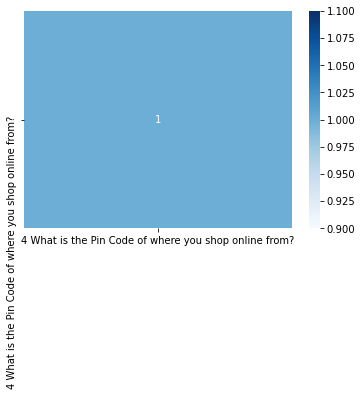

In [6]:
# Visualizing the null values in the dataset using heatmap
sns.heatmap(df.corr(),annot = True,cmap='Blues');

###### Observations: From the heatmap, it is clear that there are no missing values.

In [7]:
# Checking for dtypes
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

##### Observations : There are only one numerical feature that is "4 What is the Pin Code of where you shop online from?" and the remaining 70 features are of  categorical .

In [8]:
# Checking for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [9]:
# Checking for count of unique values in each feature
for s in  df.columns:
    print(s,df[s].nunique())

1Gender of respondent 2
2 How old are you?  5
3 Which city do you shop online from? 11
4 What is the Pin Code of where you shop online from? 39
5 Since How Long You are Shopping Online ? 5
6 How many times you have made an online purchase in the past 1 year? 6
7 How do you access the internet while shopping on-line? 4
8 Which device do you use to access the online shopping? 4
9 What is the screen size of your mobile device?						                                         4
10 What is the operating system (OS) of your device?				                                           3
11 What browser do you run on your device to access the website?			                                                           4
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    3
13 After first visit, how do you reach the online retail store?				                                                    5
14 How much t

In [10]:
# Checking for unique values in each feature
for s in  df.columns:
    print(s,df[s].unique())

1Gender of respondent ['Male' 'Female']
2 How old are you?  ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
3 Which city do you shop online from? ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
4 What is the Pin Code of where you shop online from? [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]
5 Since How Long You are Shopping Online ? ['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']
6 How many times you have made an online purchase in the past 1 year? ['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times' '42 times and above']
7 How do you access the internet while shopping on-line? ['Dial-u

###### Observations:
    
###### There are some categorical columns in which we can convert them to numerical without having the effect on data

In [11]:
# Changing the values in the columns from 17 to 47
for i in df.columns[17:47]:
    df[i] = df[i].replace(['Strongly agree (5)','Agree (4)','Indifferent (3)','indifferent(3)', 
                           'indifferent  (3)','indifferent (3)','Dis-agree (2)', 'Disagree (2)',
                           'Strongly disagree (1)'],['5','4','3','3','3','3','2','2','1'])

In [12]:
# Converting the datatypes from object to int
df['18 The content on the website must be easy to read and understand']=df['18 The content on the website must be easy to read and understand'].astype(int)
df['19 Information on similar product to the one highlighted  is important for product comparison']=df['19 Information on similar product to the one highlighted  is important for product comparison'].astype(int)
df['20 Complete information on listed seller and product being offered is important for purchase decision.']=df['20 Complete information on listed seller and product being offered is important for purchase decision.'].astype(int)
df['21 All relevant information on listed products must be stated clearly']=df['21 All relevant information on listed products must be stated clearly'].astype(int)
df['22 Ease of navigation in website']=df['22 Ease of navigation in website'].astype(int) 
df['23 Loading and processing speed']=df['23 Loading and processing speed'].astype(int)
df['24 User friendly Interface of the website']=df['24 User friendly Interface of the website'].astype(int)
df['25 Convenient Payment methods']=df['25 Convenient Payment methods'].astype(int)
df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time']=df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].astype(int)
df['27 Empathy (readiness to assist with queries) towards the customers']=df['27 Empathy (readiness to assist with queries) towards the customers'].astype(int)
df['28 Being able to guarantee the privacy of the customer']=df['28 Being able to guarantee the privacy of the customer'].astype(int)
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)']=df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].astype(int)
df['30 Online shopping gives monetary benefit and discounts']=df['30 Online shopping gives monetary benefit and discounts'].astype(int)
df['31 Enjoyment is derived from shopping online']=df['31 Enjoyment is derived from shopping online'].astype(int)
df['32 Shopping online is convenient and flexible']=df['32 Shopping online is convenient and flexible'].astype(int)
df['33 Return and replacement policy of the e-tailer is important for purchase decision']=df['33 Return and replacement policy of the e-tailer is important for purchase decision'].astype(int)
df['34 Gaining access to loyalty programs is a benefit of shopping online']=df['34 Gaining access to loyalty programs is a benefit of shopping online'].astype(int)
df['35 Displaying quality Information on the website improves satisfaction of customers']=df['35 Displaying quality Information on the website improves satisfaction of customers'].astype(int)
df['36 User derive satisfaction while shopping on a good quality website or application']=df['36 User derive satisfaction while shopping on a good quality website or application'].astype(int)
df['37 Net Benefit derived from shopping online can lead to users satisfaction']=df['37 Net Benefit derived from shopping online can lead to users satisfaction'].astype(int)
df['38 User satisfaction cannot exist without trust']=df['38 User satisfaction cannot exist without trust'].astype(int)
df['39 Offering a wide variety of listed product in several category']=df['39 Offering a wide variety of listed product in several category'].astype(int)
df['40 Provision of complete and relevant product information']=df['40 Provision of complete and relevant product information'].astype(int)
df['41 Monetary savings']=df['41 Monetary savings'].astype(int)
df['42 The Convenience of patronizing the online retailer']=df['42 The Convenience of patronizing the online retailer'].astype(int)
df['43 Shopping on the website gives you the sense of adventure']=df['43 Shopping on the website gives you the sense of adventure'].astype(int)
df['44 Shopping on your preferred e-tailer enhances your social status']=df['44 Shopping on your preferred e-tailer enhances your social status'].astype(int)
df['45 You feel gratification shopping on your favorite e-tailer']=df['45 You feel gratification shopping on your favorite e-tailer'].astype(int)
df['46 Shopping on the website helps you fulfill certain roles']=df['46 Shopping on the website helps you fulfill certain roles'].astype(int)
df['47 Getting value for money spent']=df['47 Getting value for money spent'].astype(int)

In [13]:
Categorical_features = list(df.select_dtypes(include=object).columns)
print('Length of Categorical Features:', len(Categorical_features))
Categorical_features

Length of Categorical Features: 40


['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
 '14 How much time do you expl

###### Observations:
    
###### There are Categorical Features of 40 Now.

In [14]:
# Making a count of Numerical_features and displaying them
Numerical_features = list(df.select_dtypes(include=np.number).columns)
print('Length of Numerical Features:', len(Numerical_features))
Numerical_features

Length of Numerical Features: 31


['4 What is the Pin Code of where you shop online from?',
 '18 The content on the website must be easy to read and understand',
 '19 Information on similar product to the one highlighted  is important for product comparison',
 '20 Complete information on listed seller and product being offered is important for purchase decision.',
 '21 All relevant information on listed products must be stated clearly',
 '22 Ease of navigation in website',
 '23 Loading and processing speed',
 '24 User friendly Interface of the website',
 '25 Convenient Payment methods',
 '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
 '27 Empathy (readiness to assist with queries) towards the customers',
 '28 Being able to guarantee the privacy of the customer',
 '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
 '30 Online shopping gives monetary benefit and discounts',
 '31 Enjoyment is derived from s

###### Observations:
    
###### There are Numerical Features of 31 Now.

# Count of each feature

In [15]:
# Checking the Count of each feature
for i in df.columns:
    print(df[i].value_counts())

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.

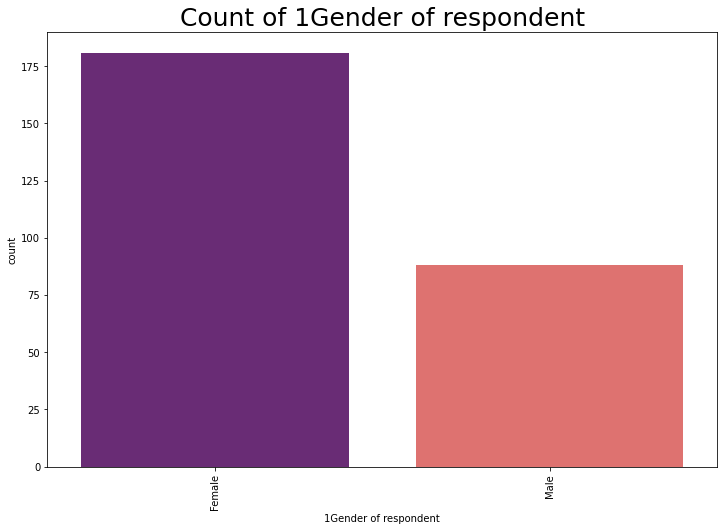

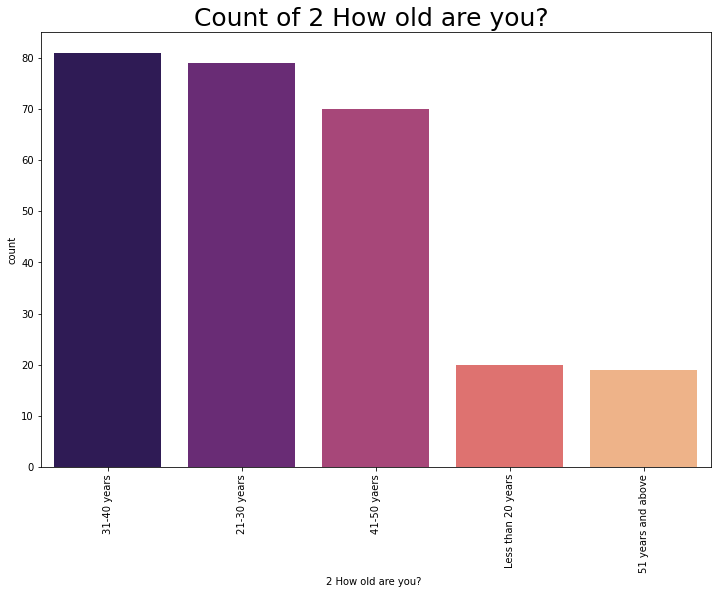

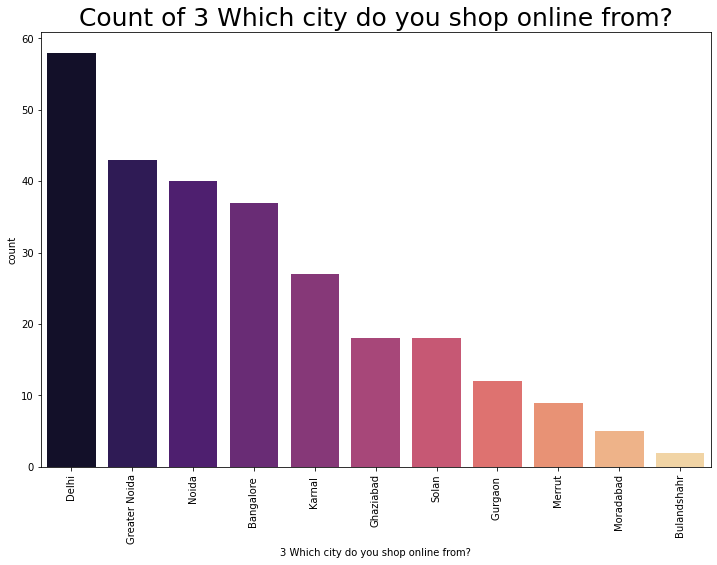

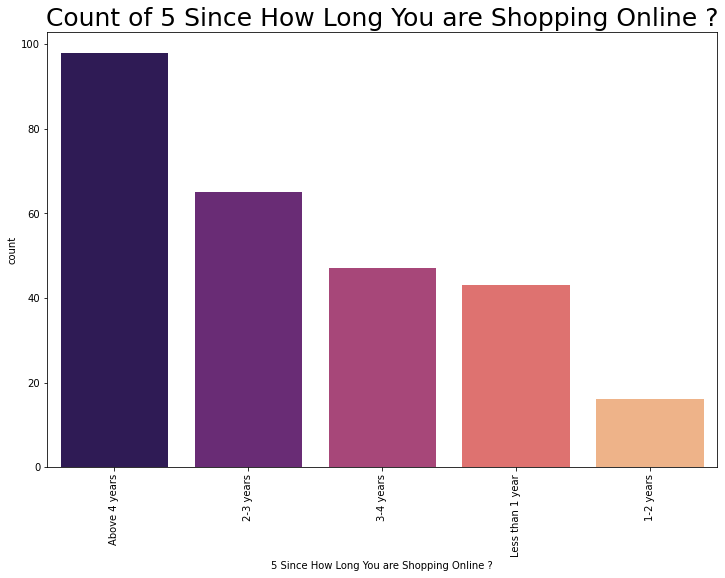

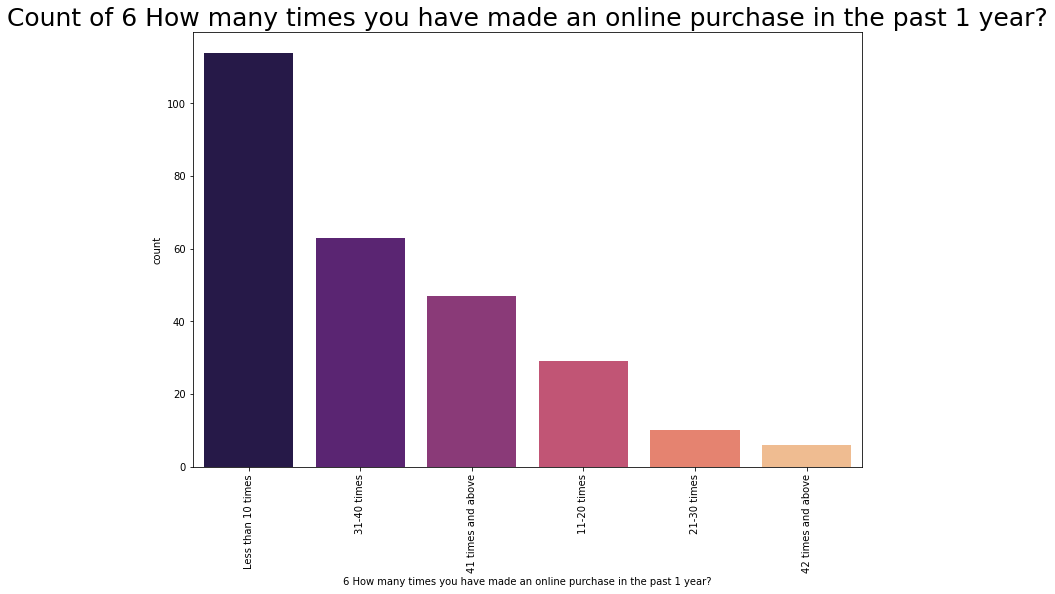

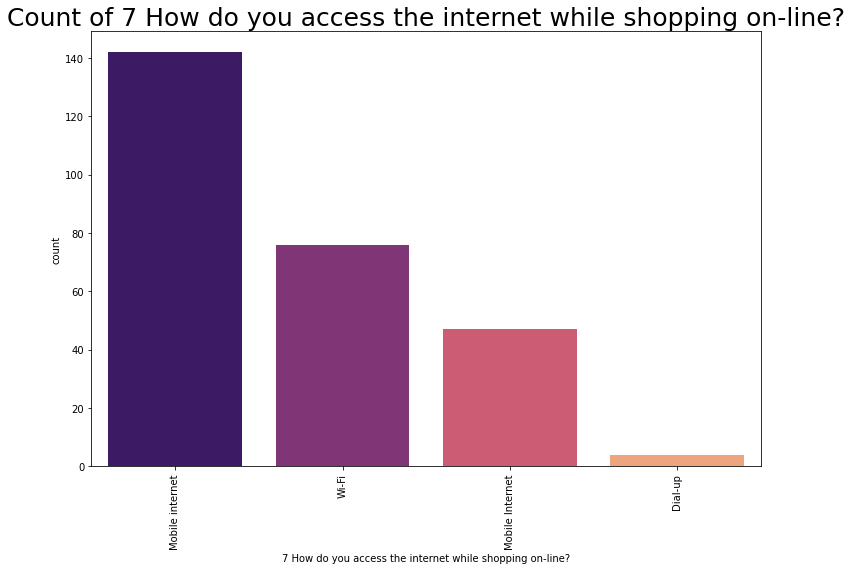

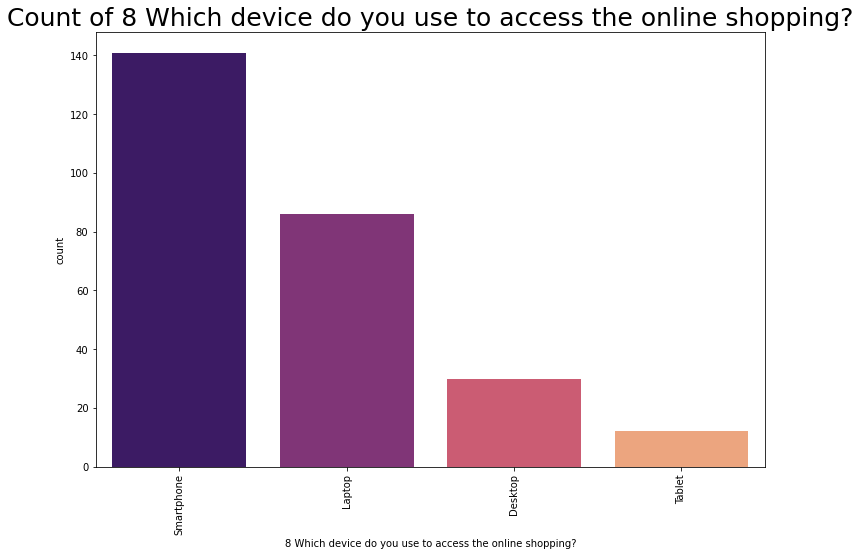

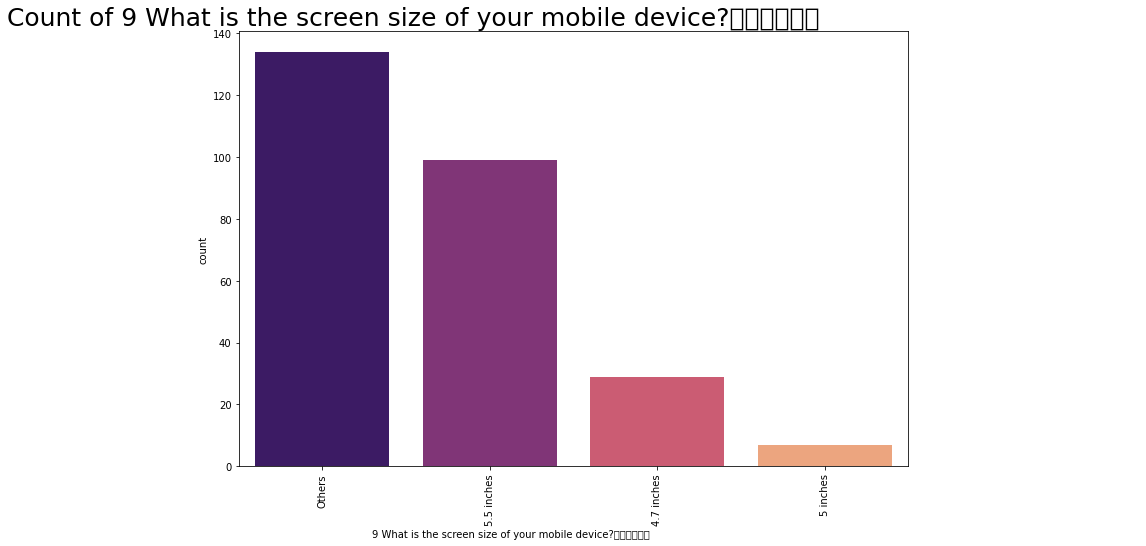

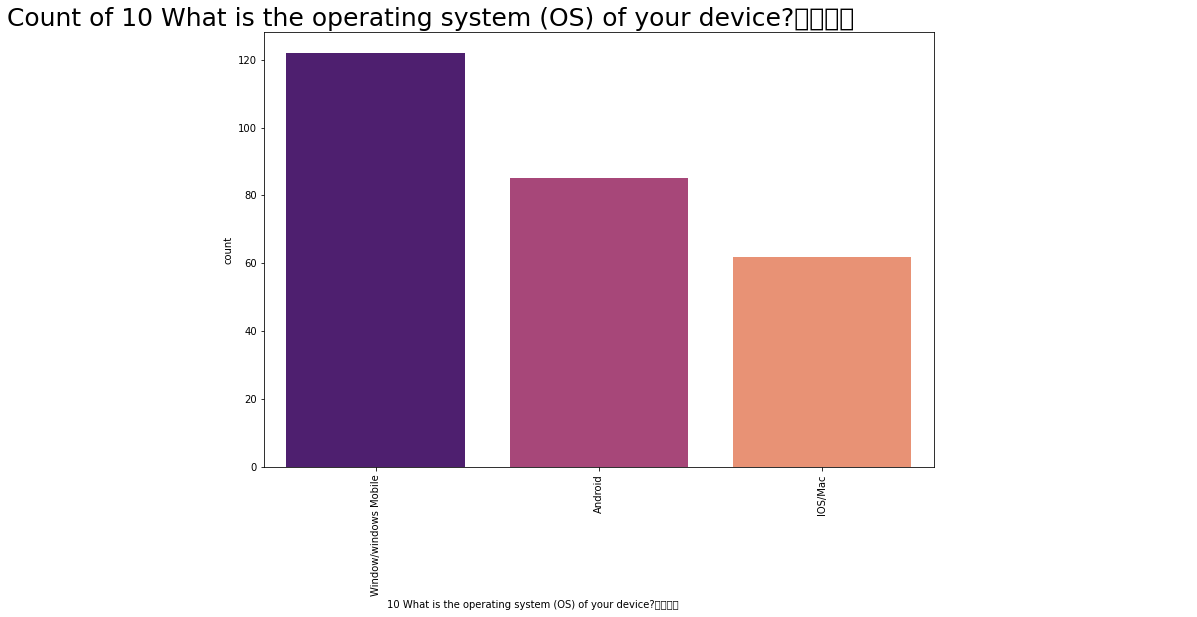

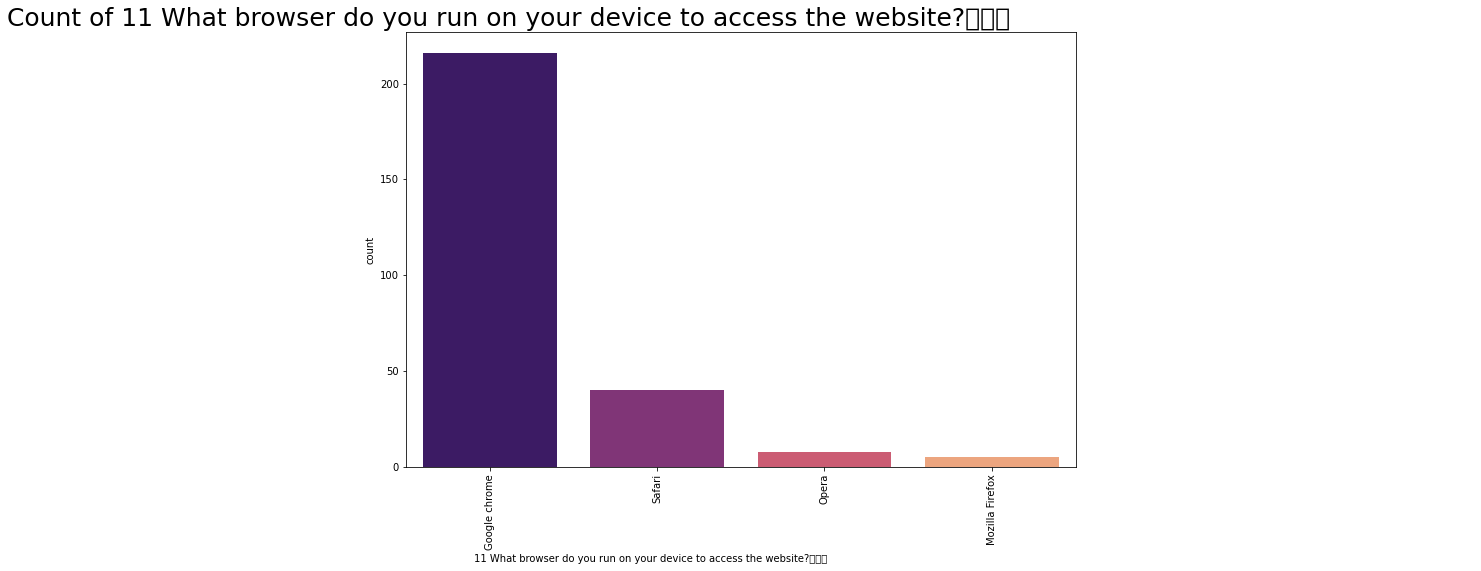

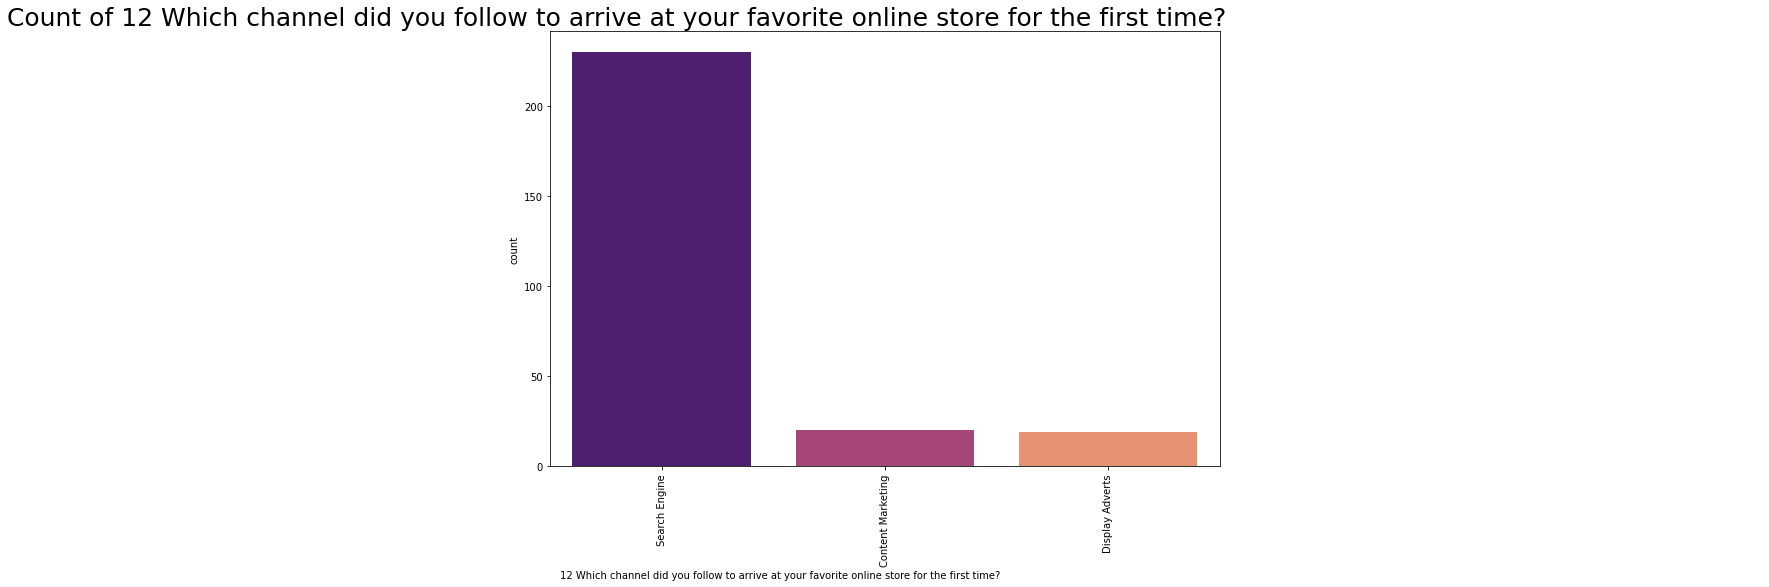

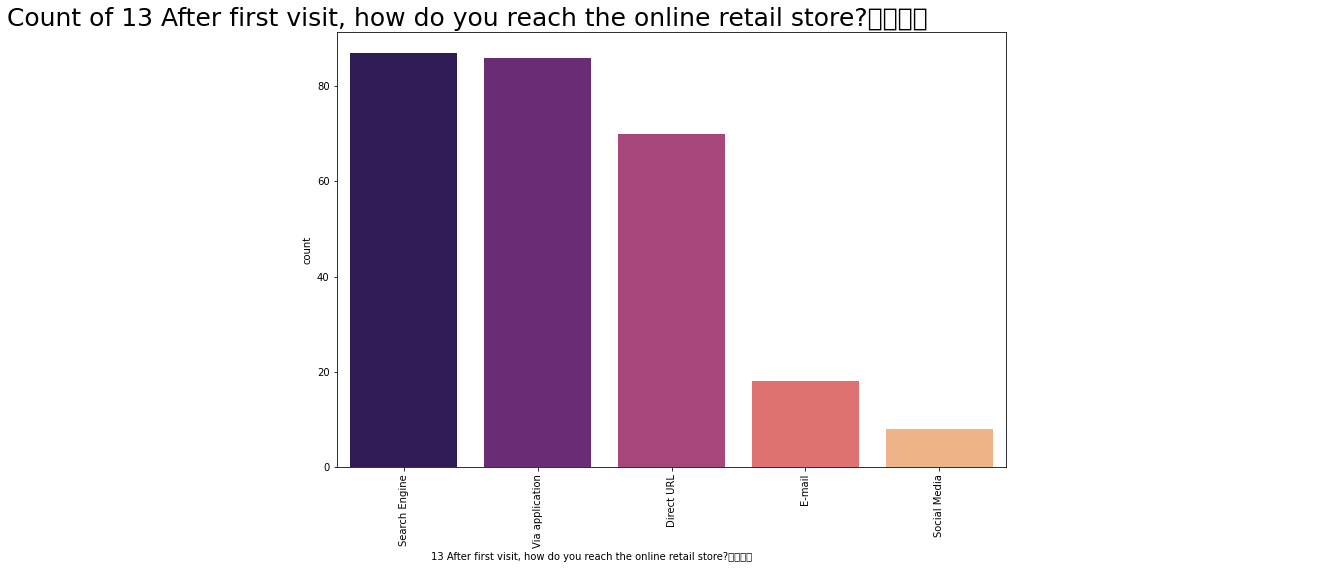

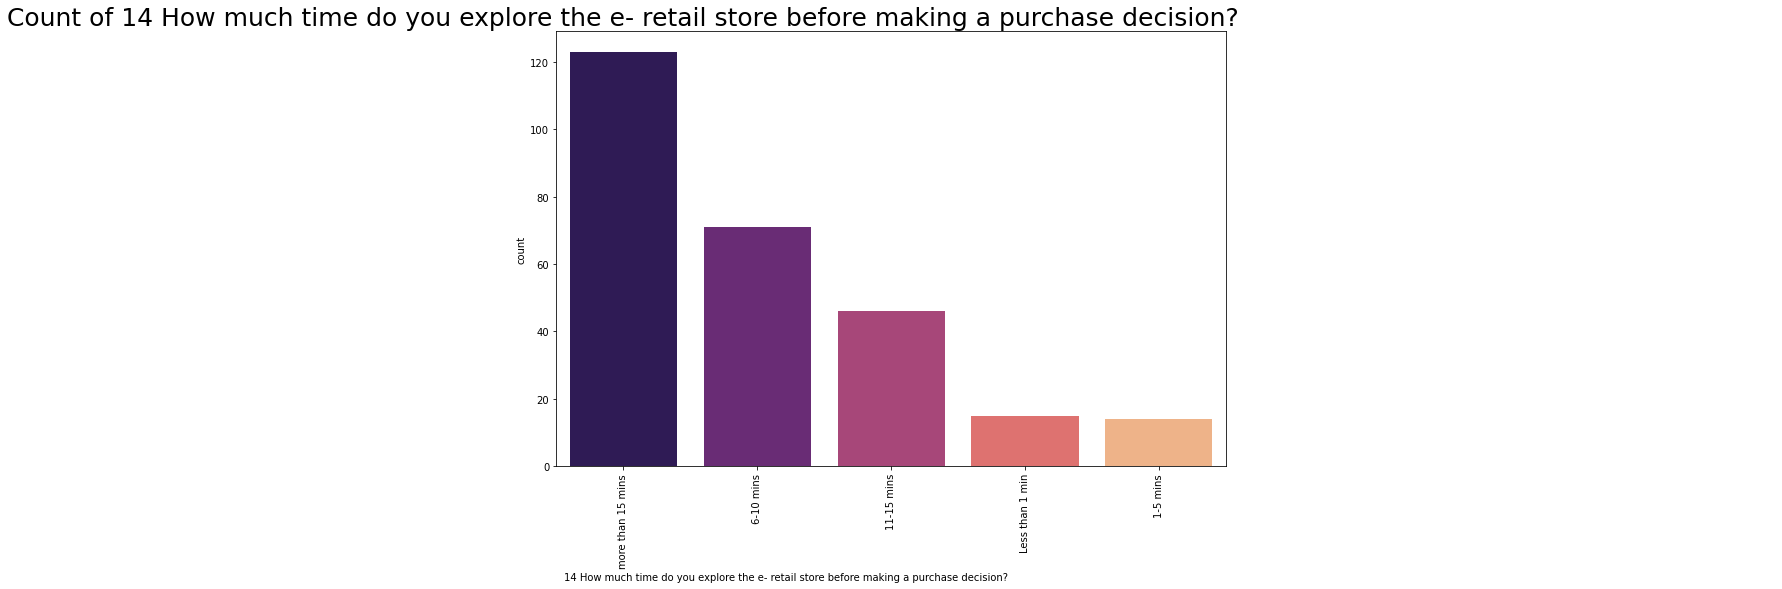

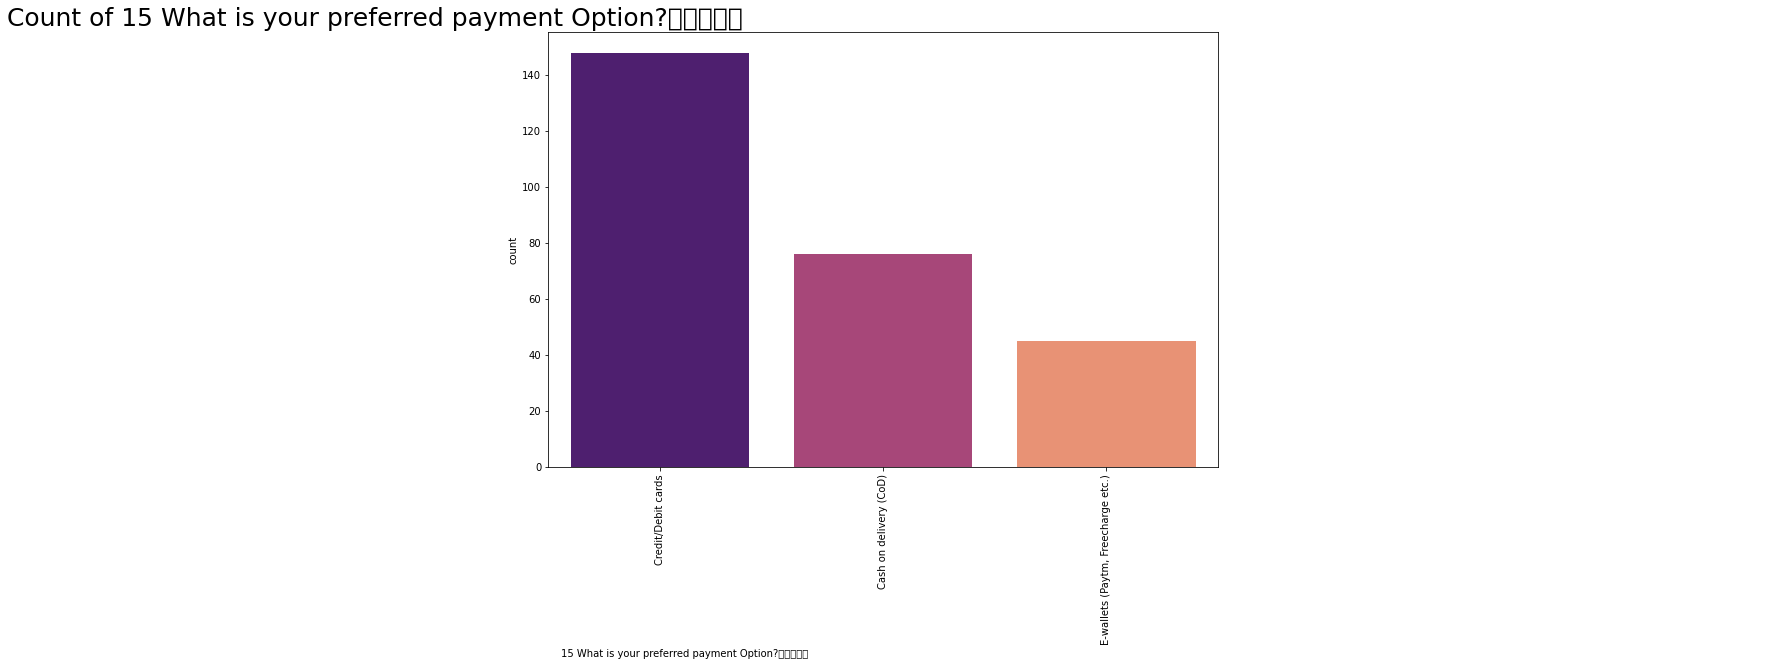

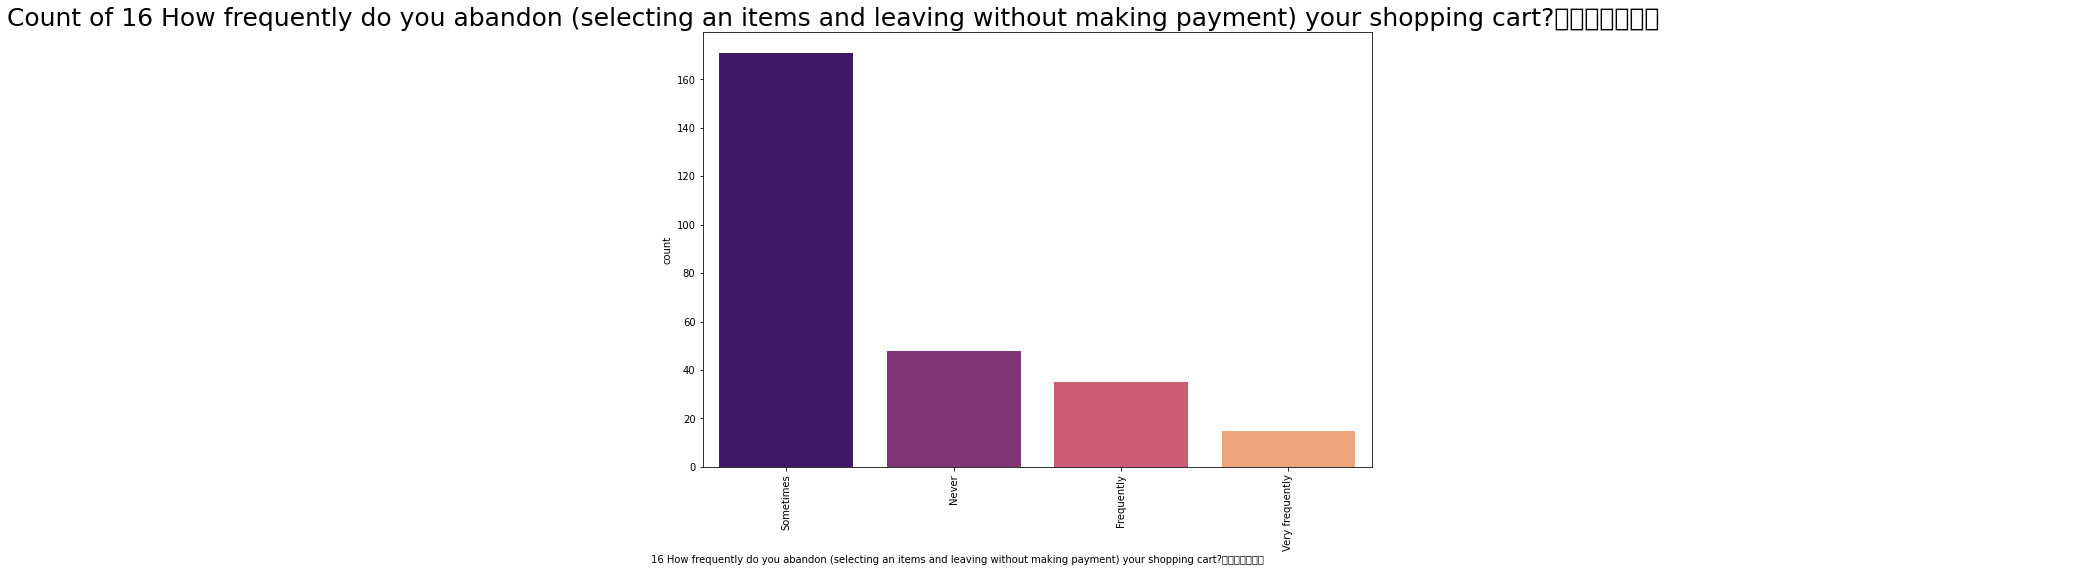

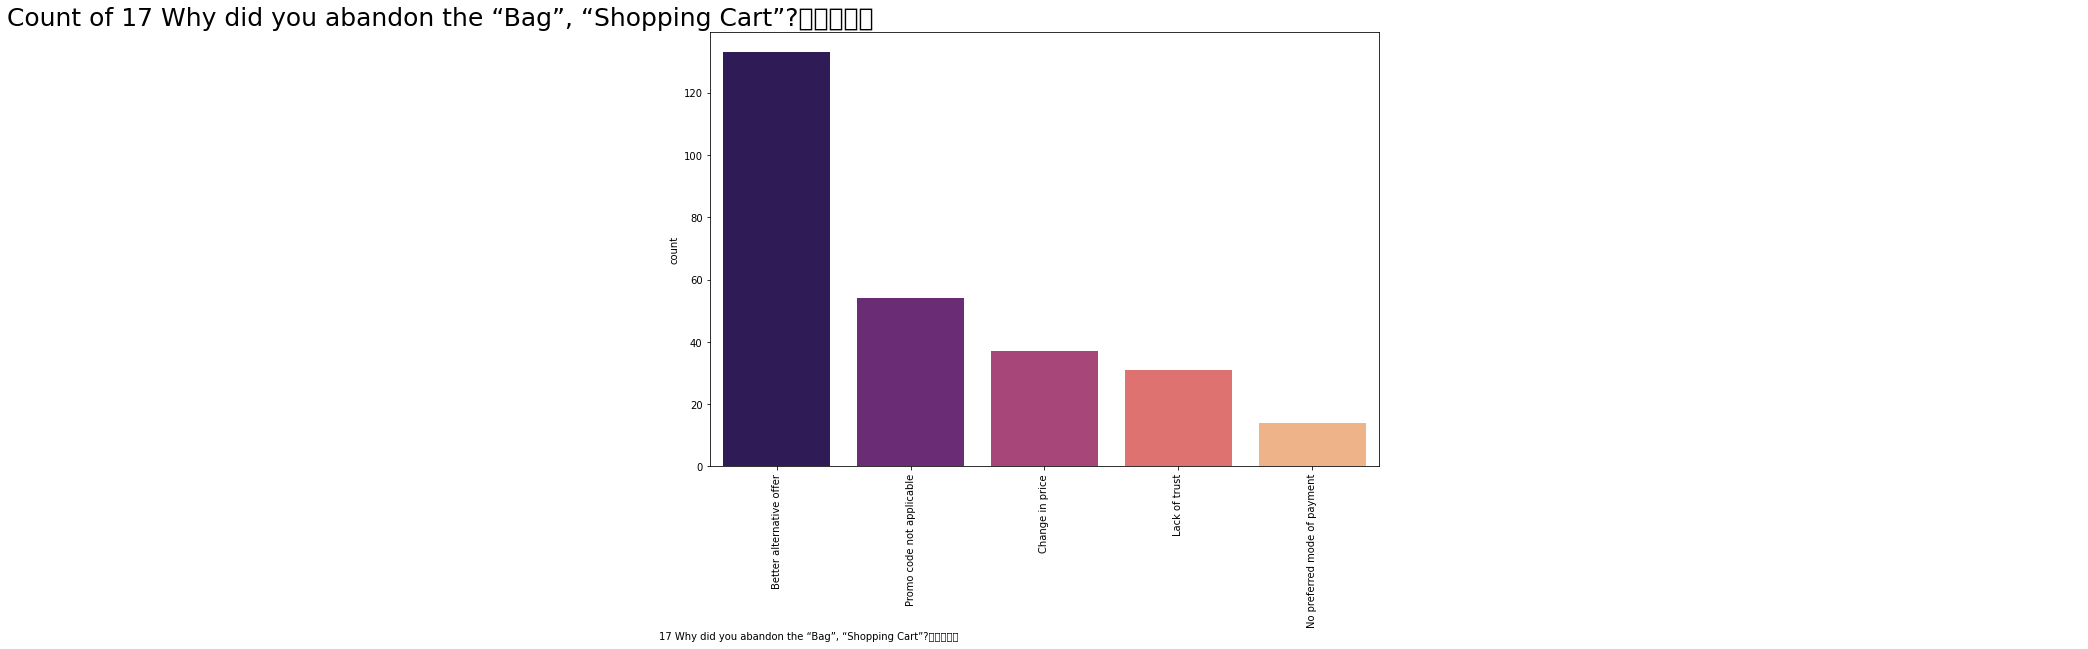

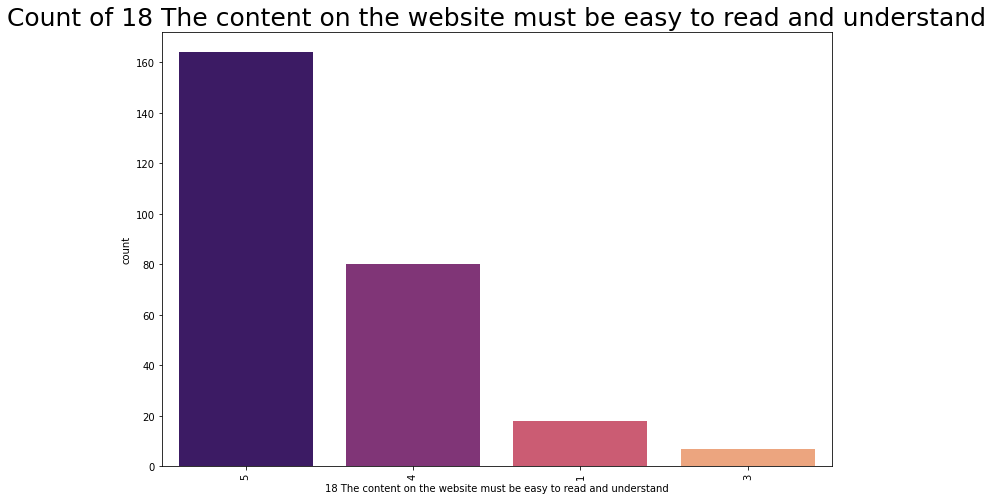

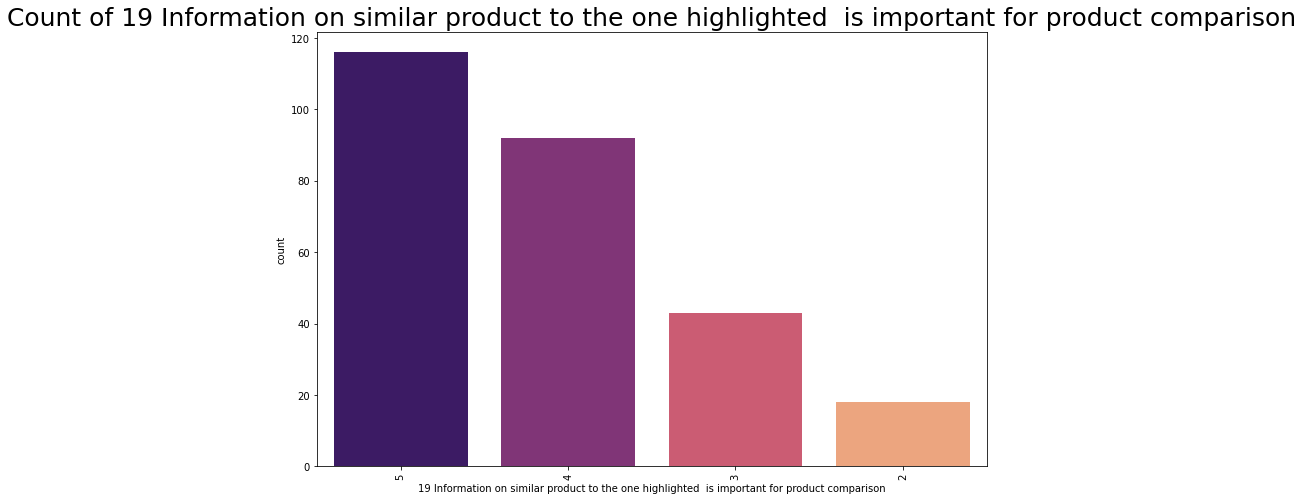

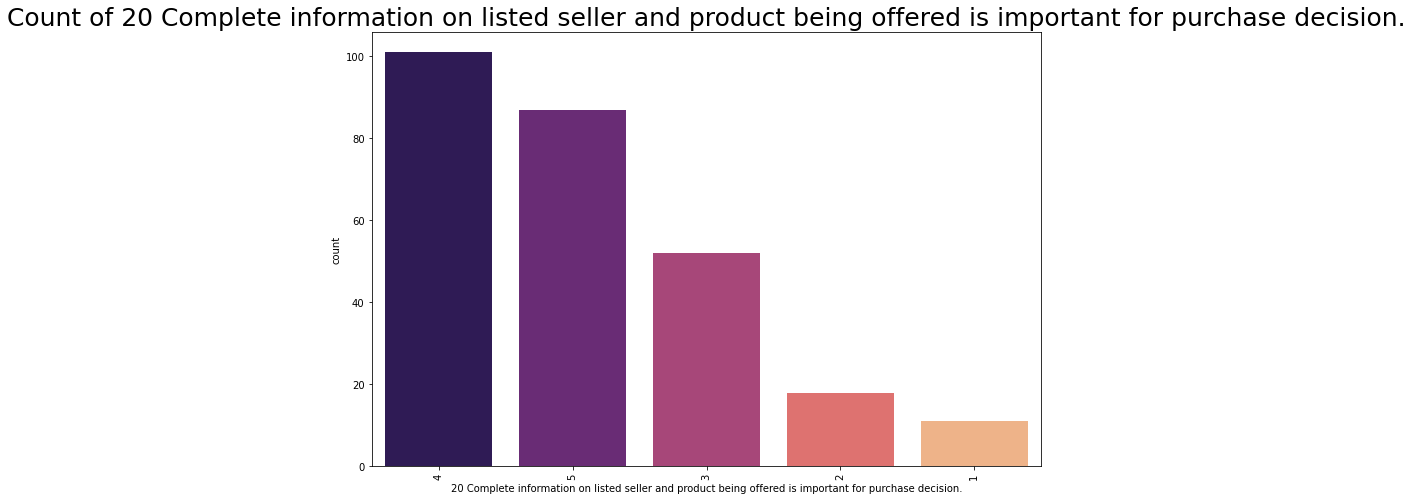

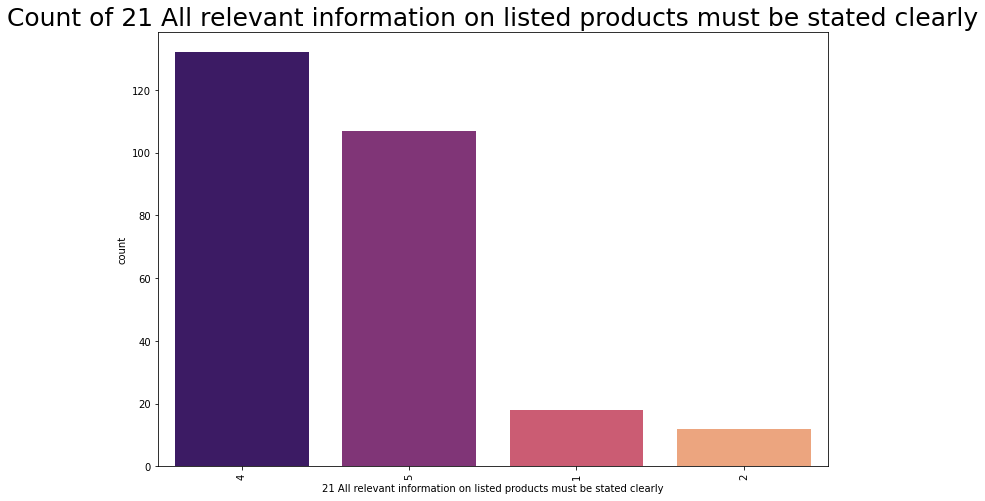

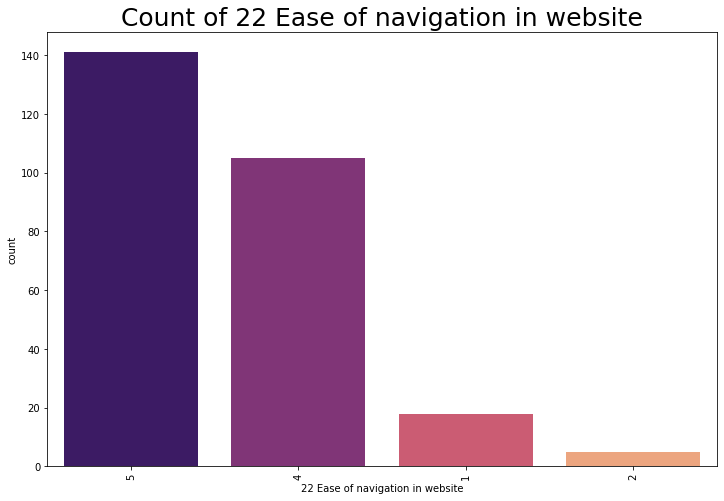

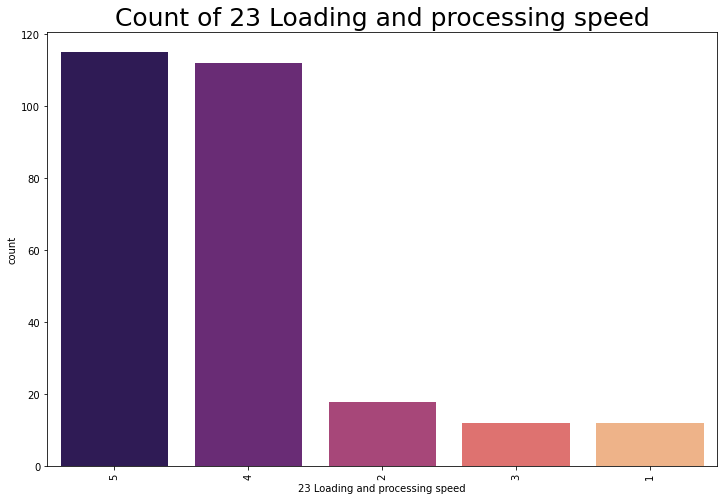

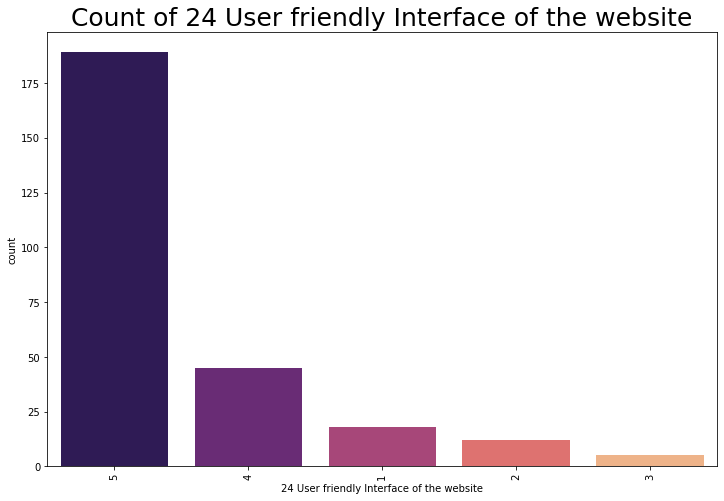

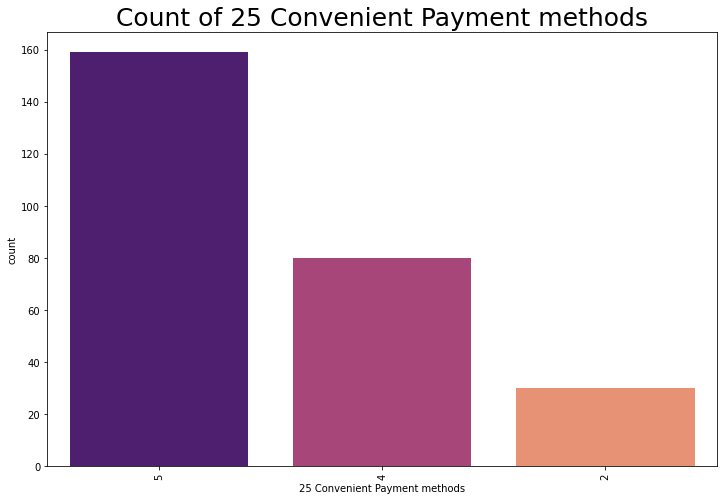

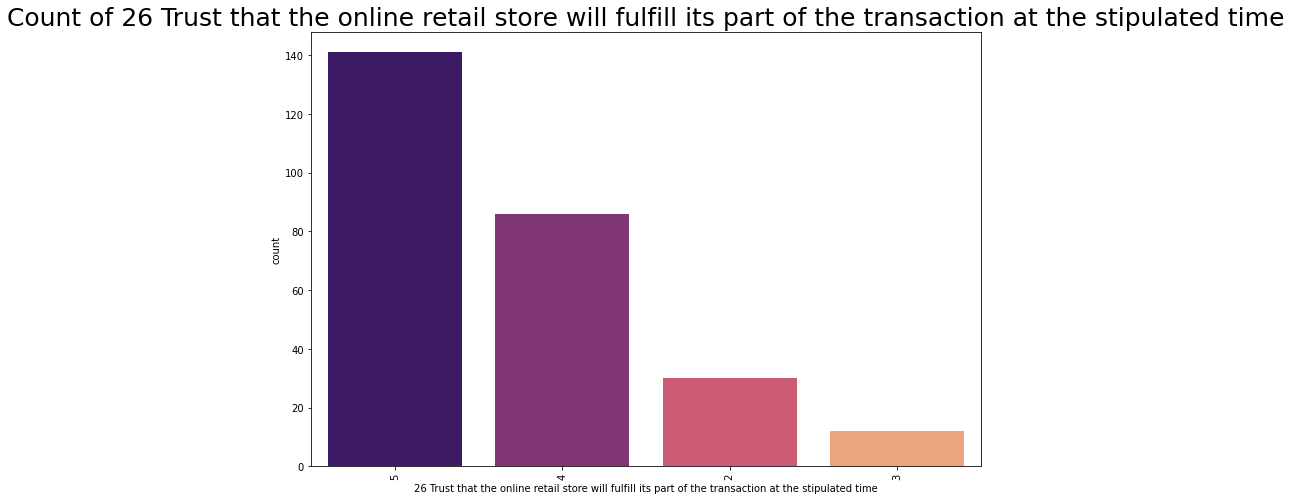

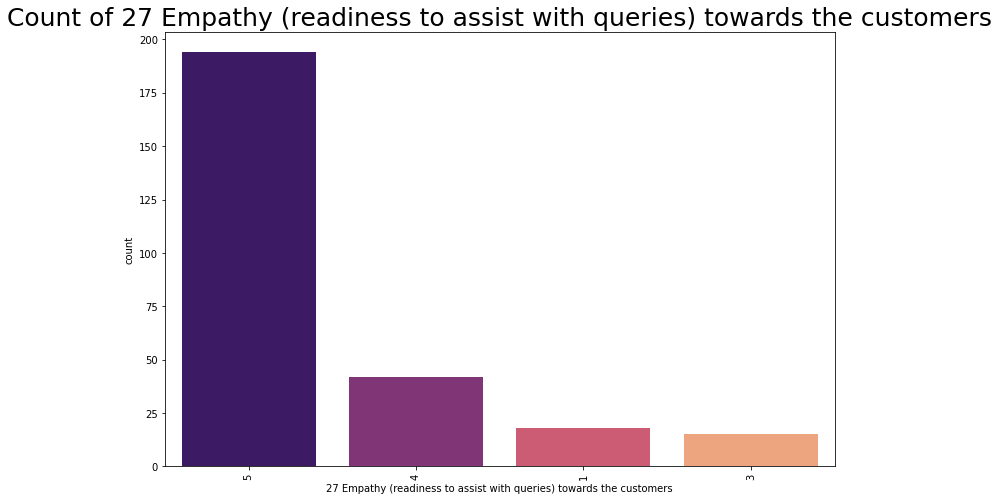

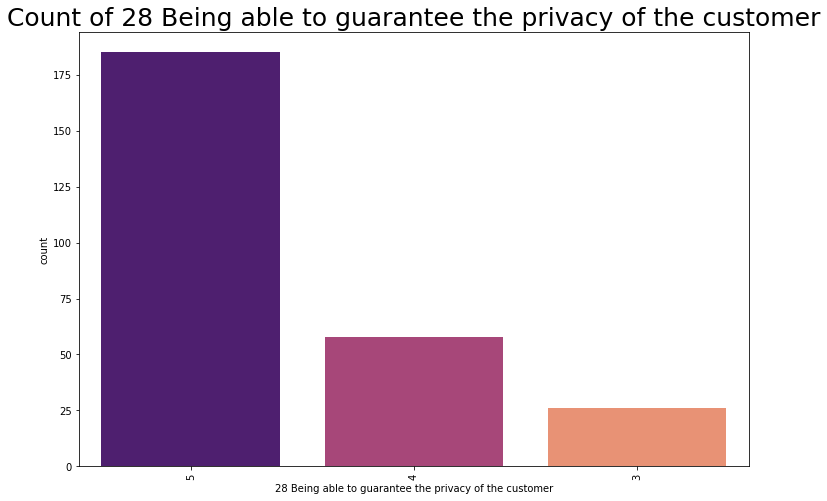

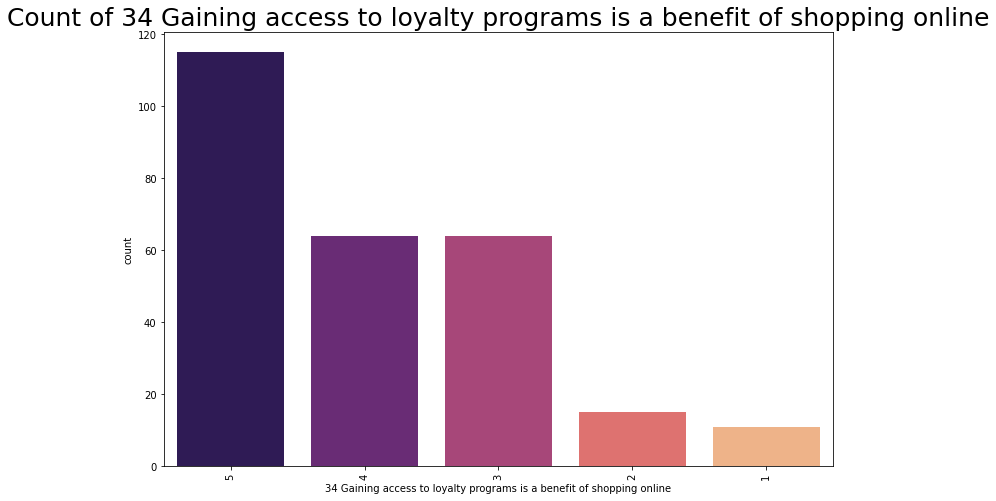

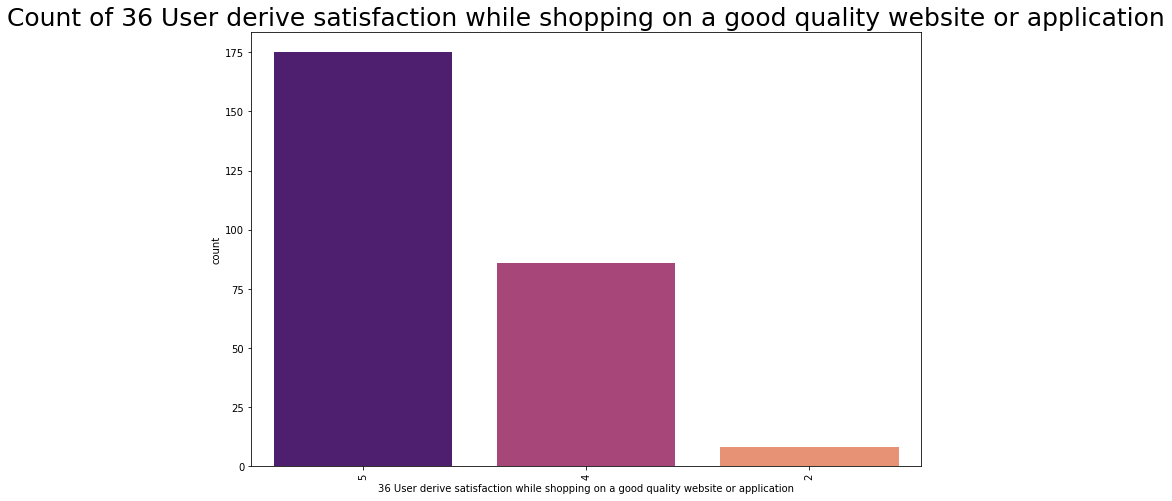

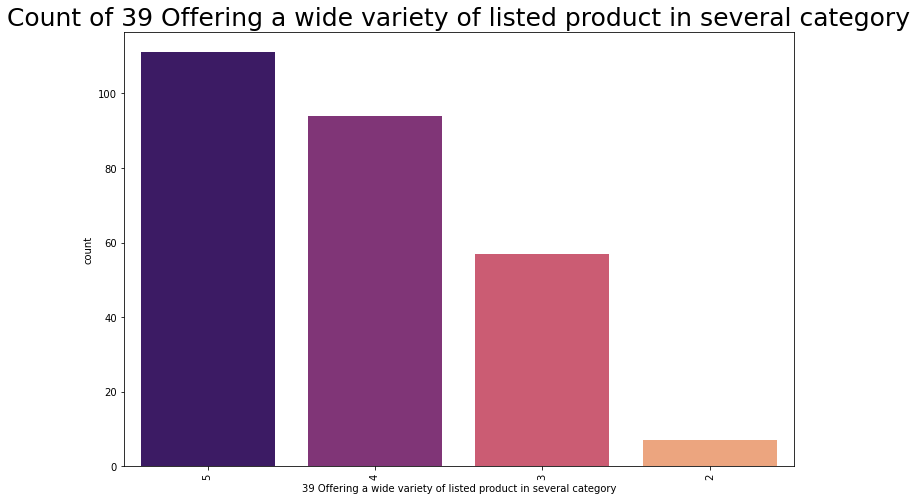

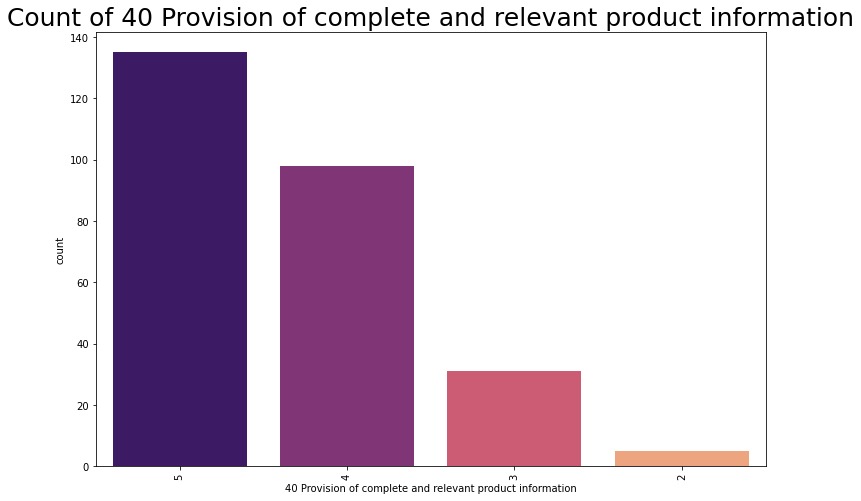

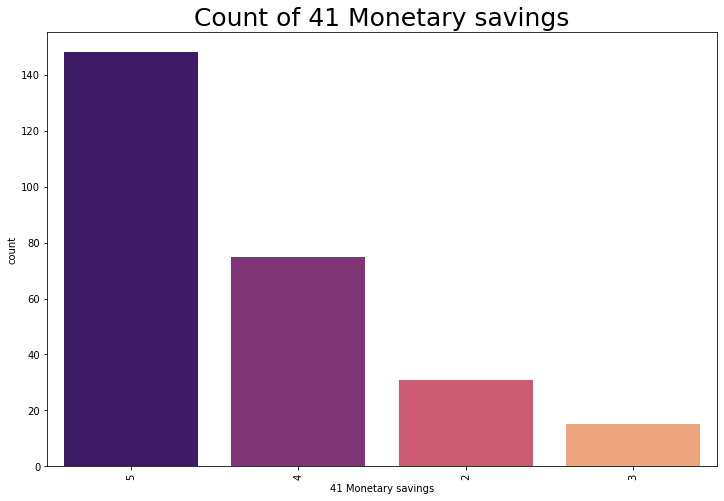

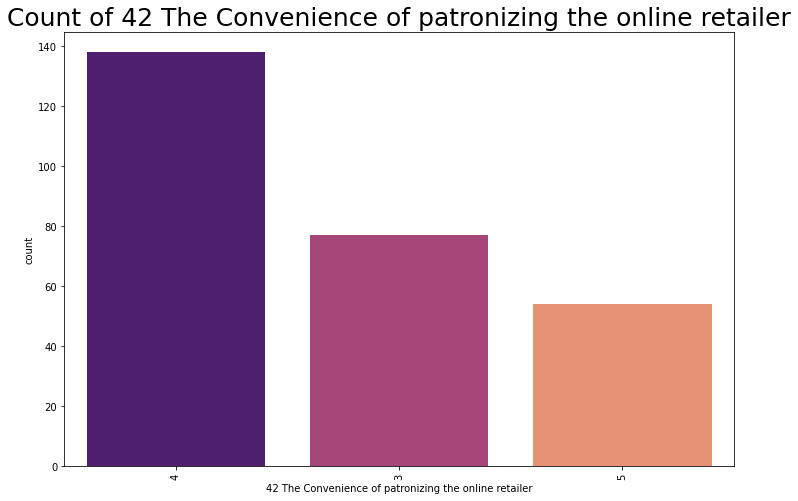

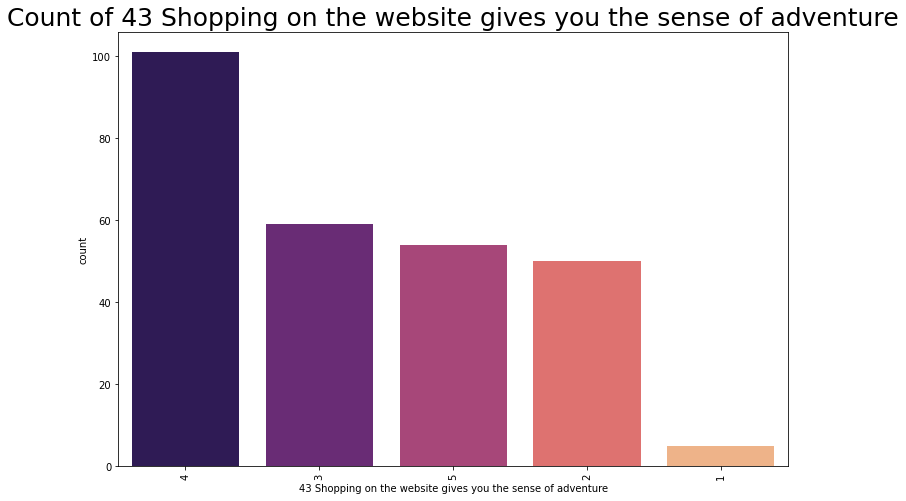

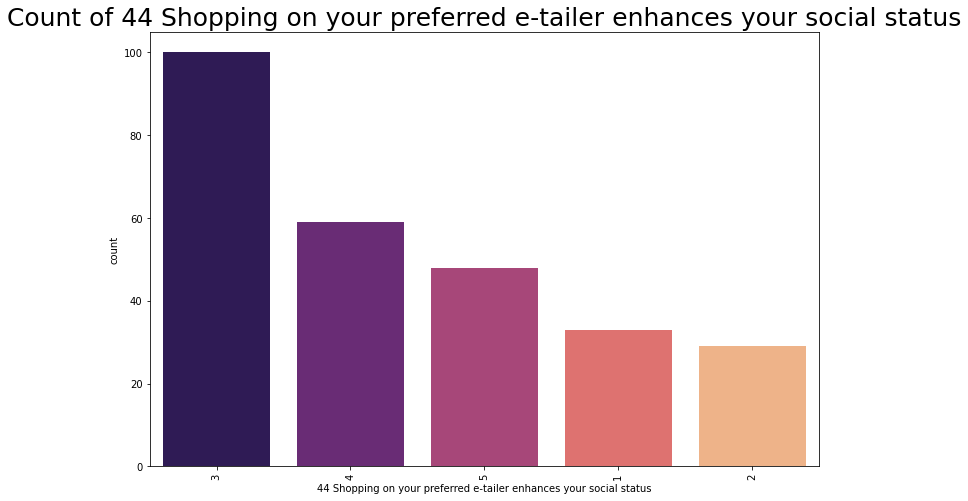

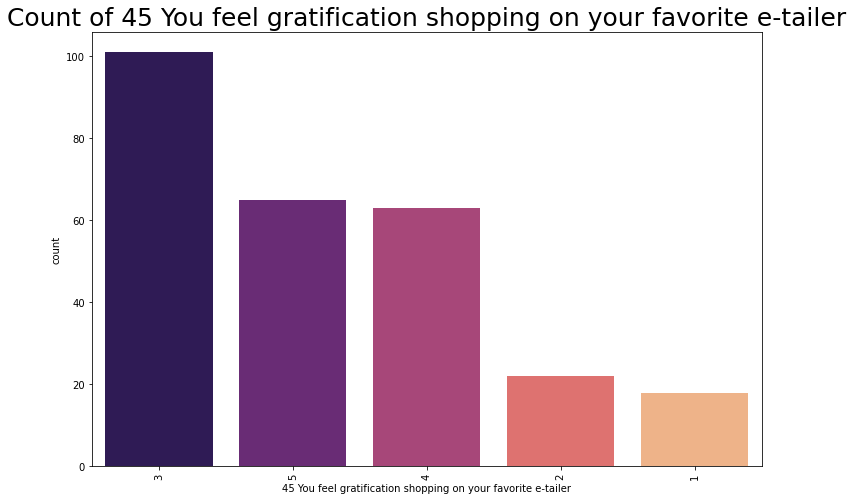

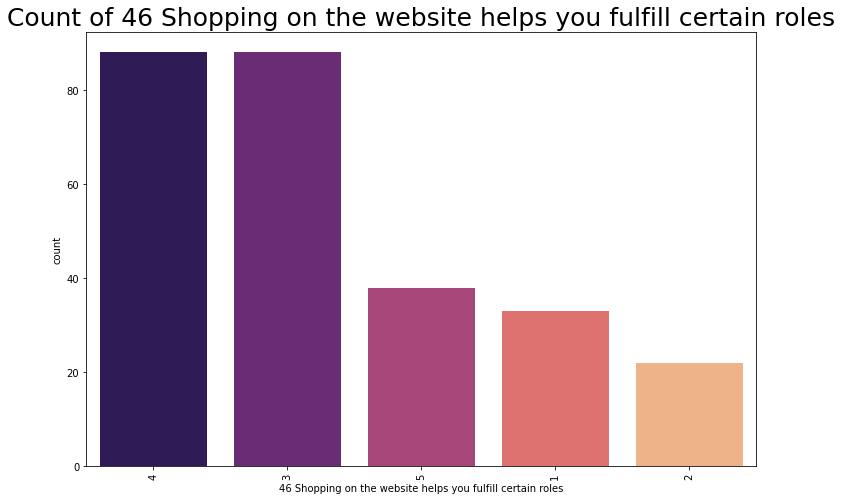

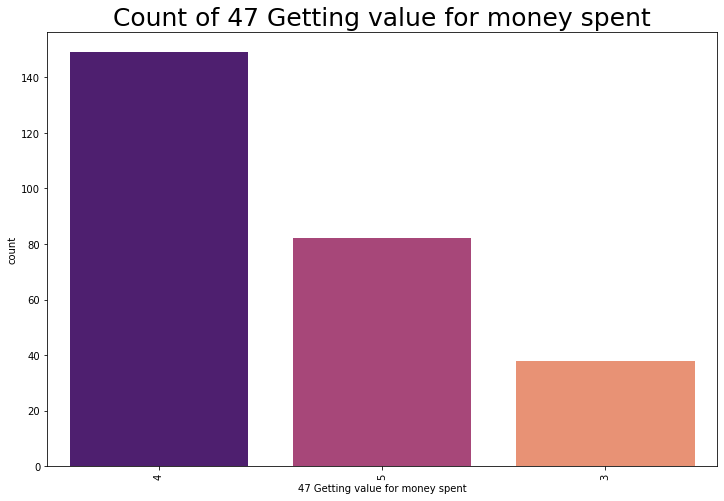

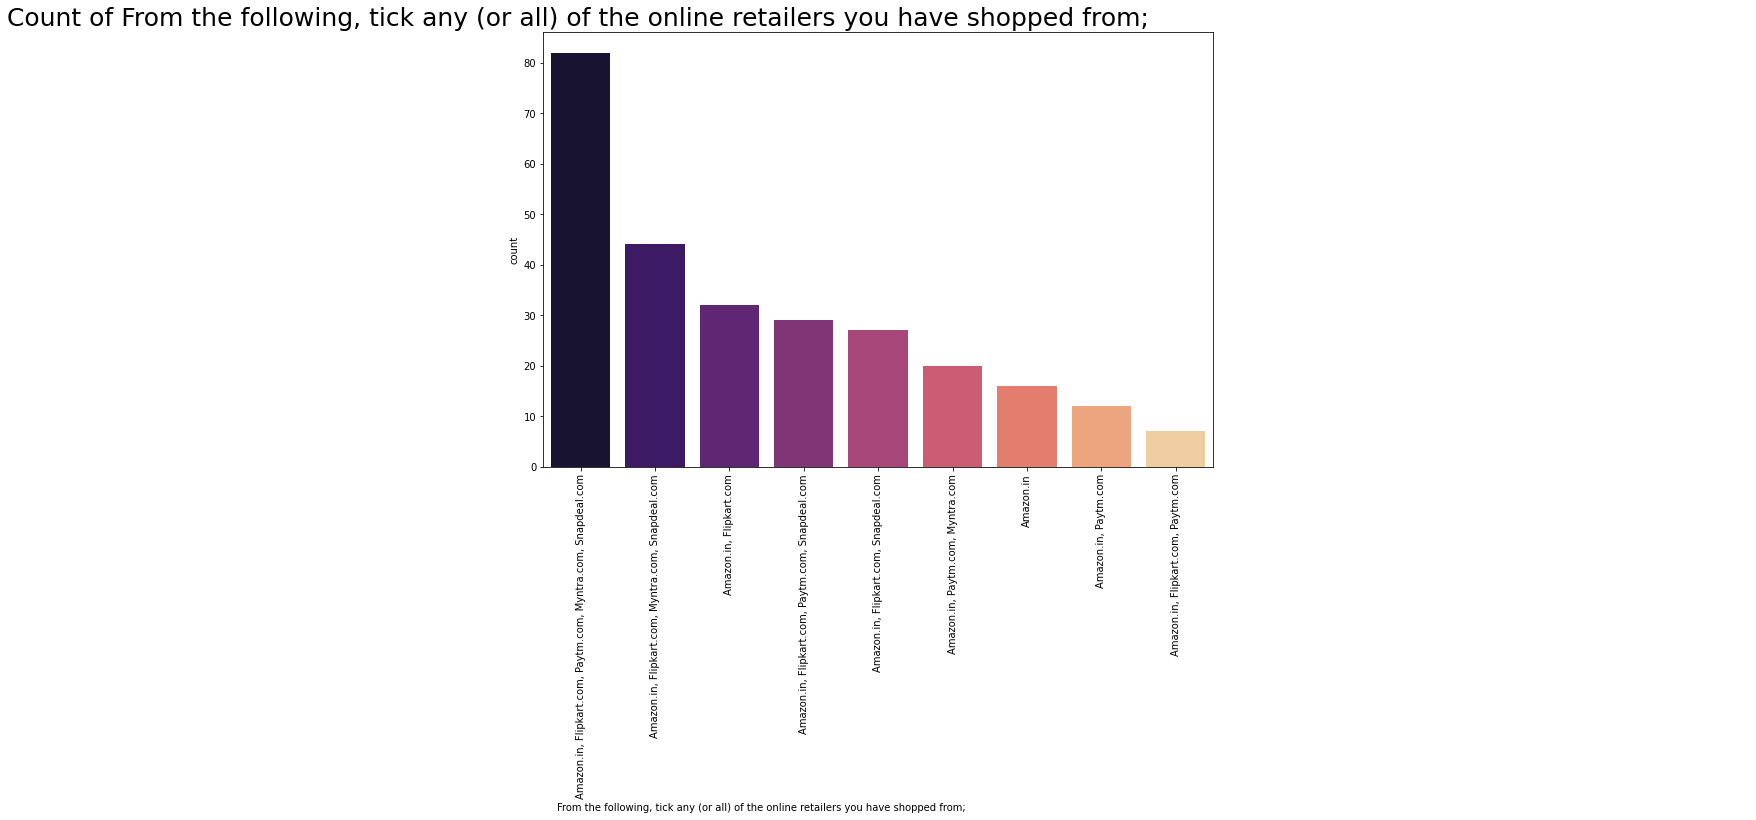

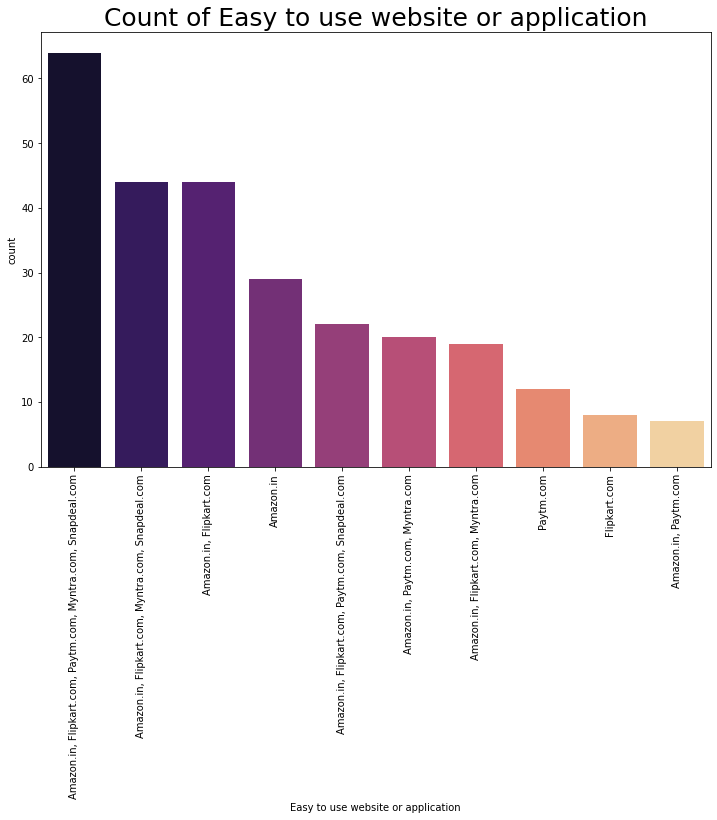

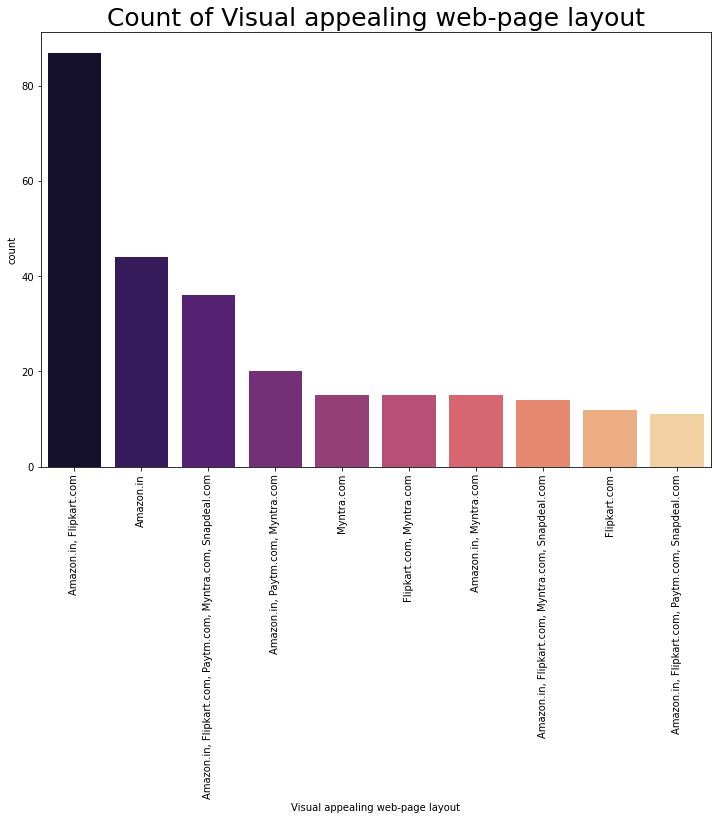

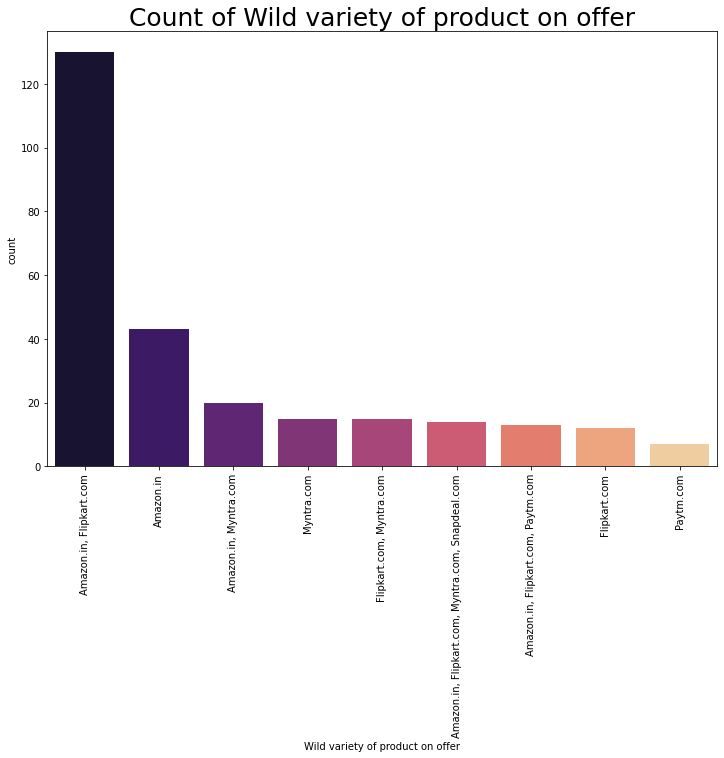

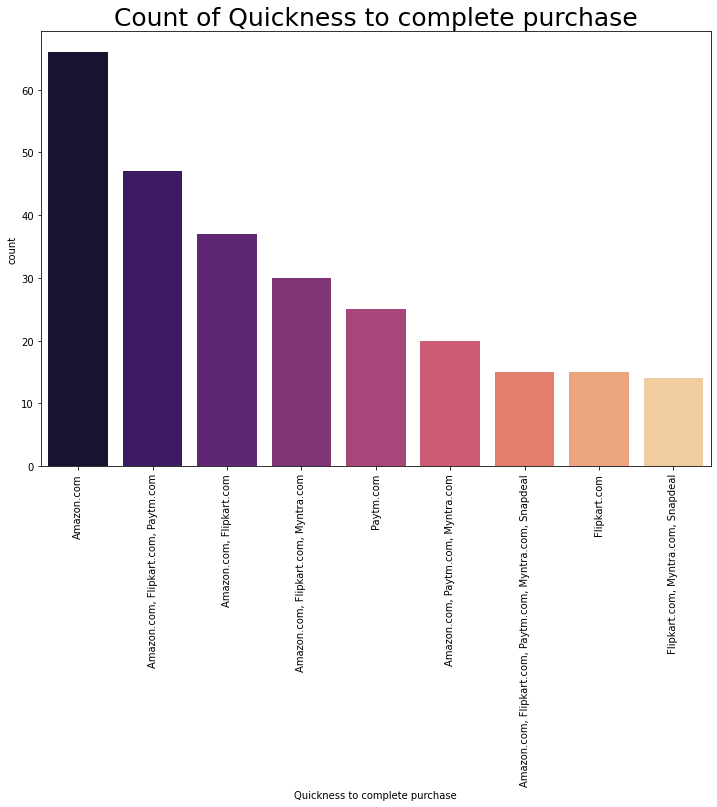

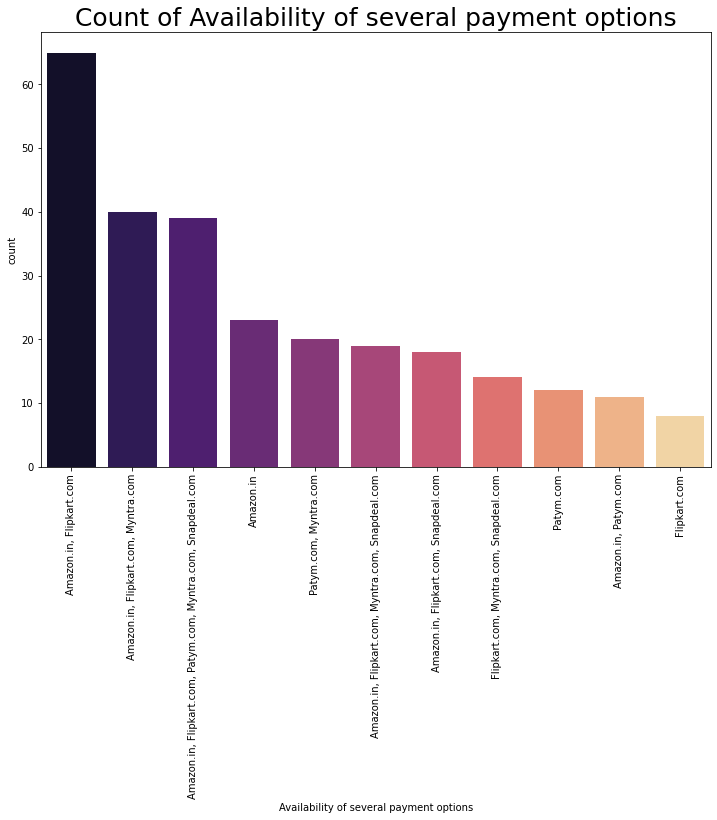

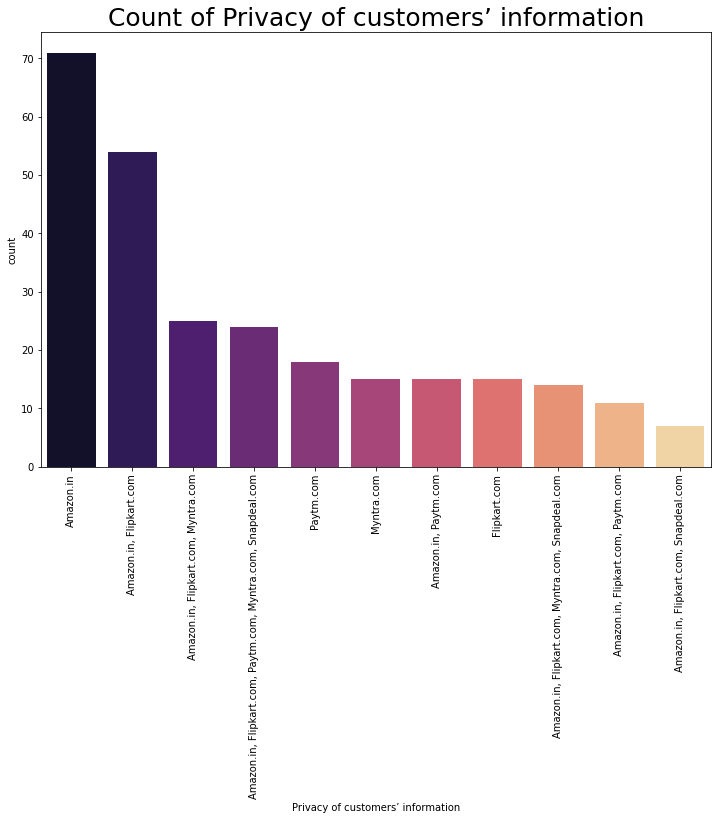

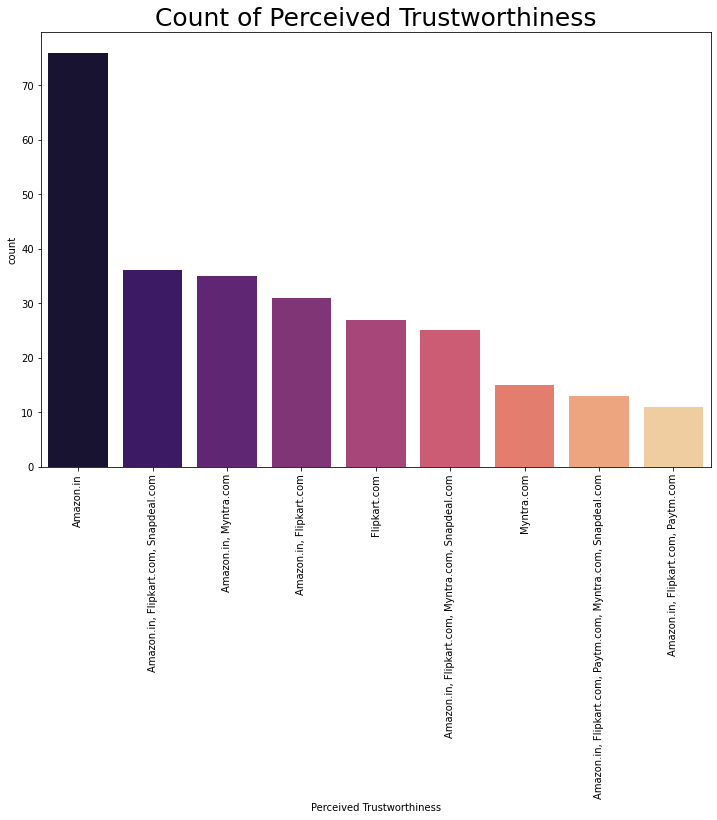

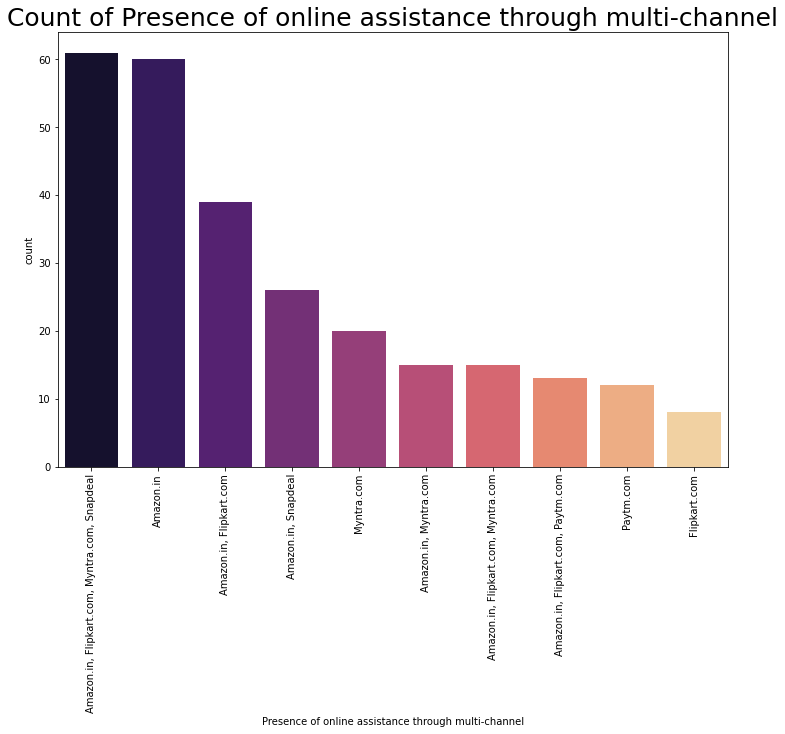

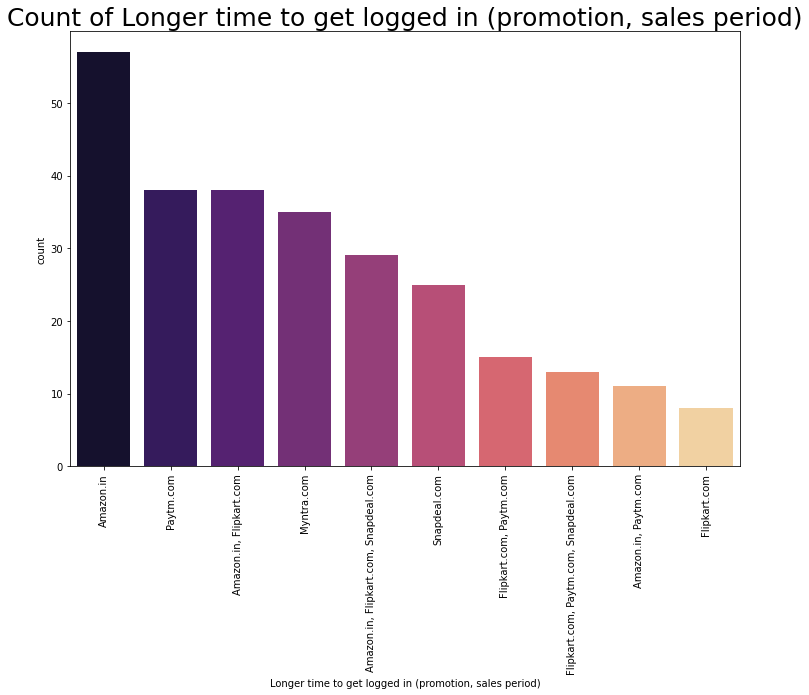

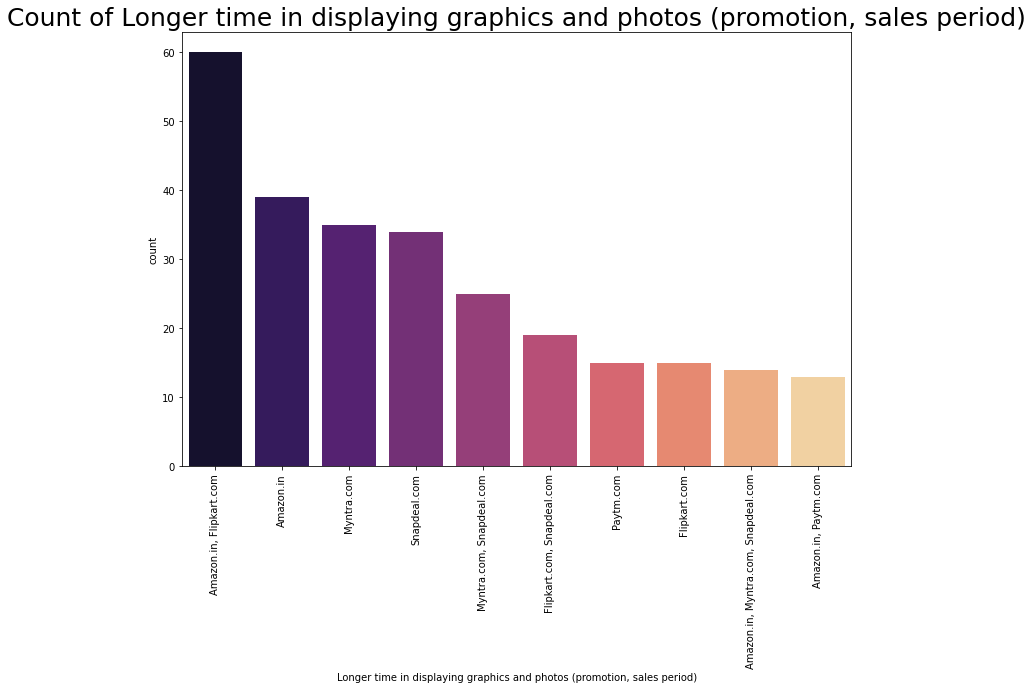

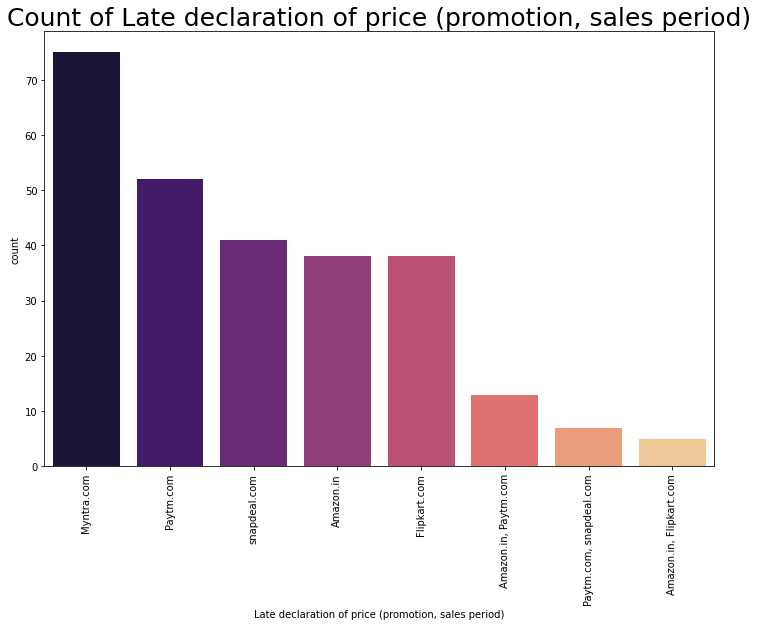

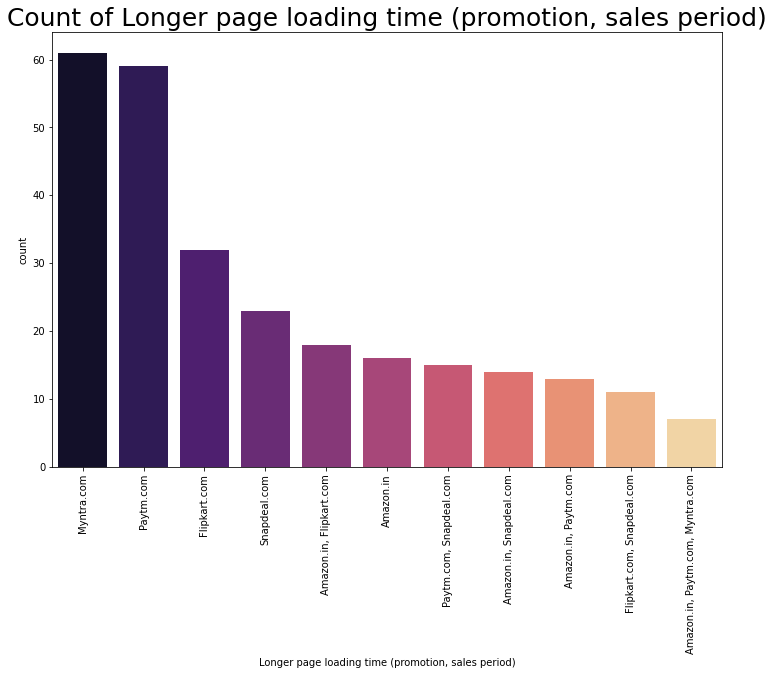

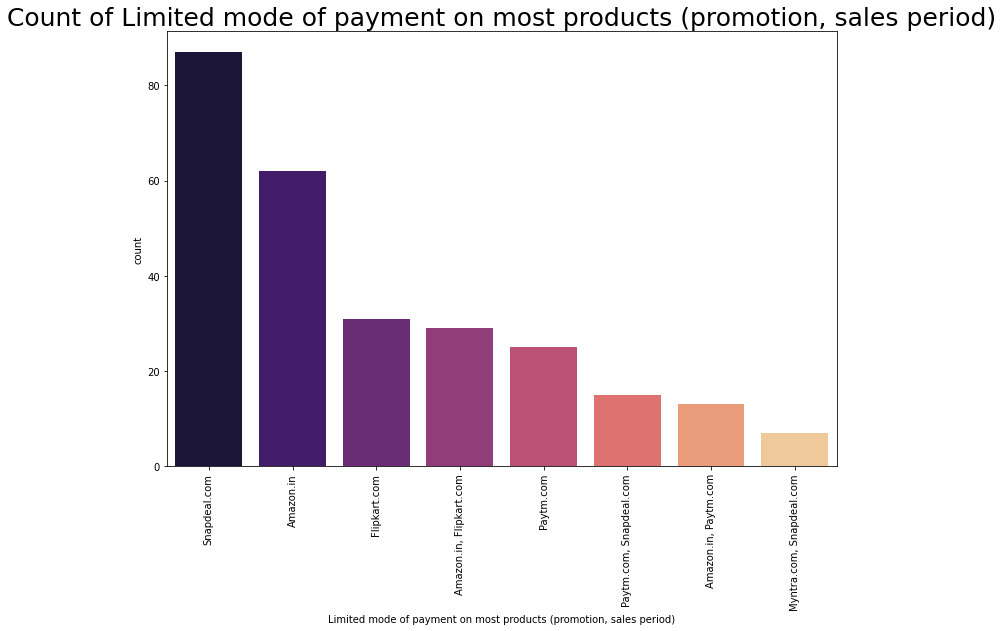

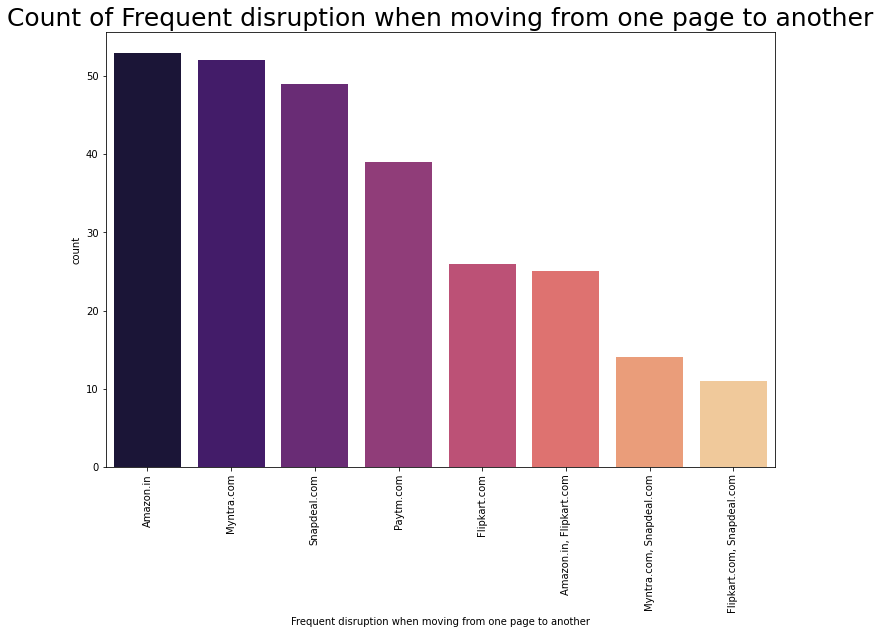

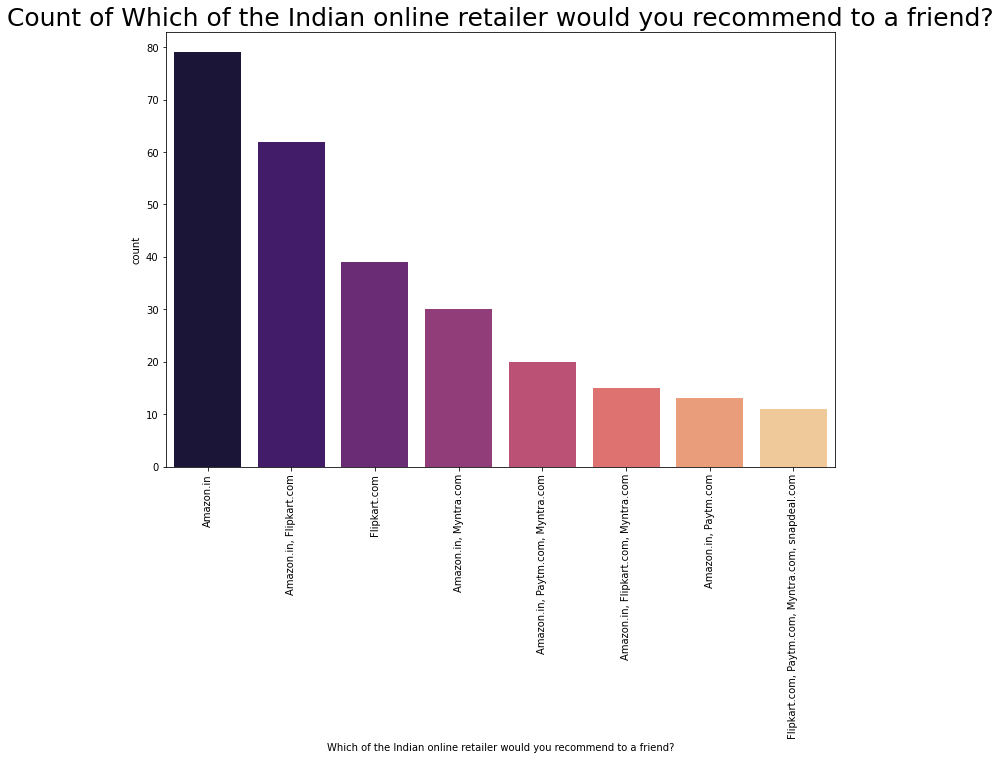

In [16]:
# Visualizing the Count of each feature using countplot
for i in df.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i, data=df,palette="magma",order = df[i].value_counts().index)
    plt.title('Count of {}'.format(i),fontsize =25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

### Observations:
The observations from above countplots are as follows:
    
==> Females are more in number than males
    
==> People of age group between 31 and 40 years tend more to do online shopping and the age group of less than 20

   years and above 51 years do less online shopping.
    
==> People belonging to Delhi have more users of e-commerce store.

==> The region having pincode of 201308 have more users of e-commerce store.

==> The users who  have been ordering for 4 years are more in number.

==> The users who order less than 10 times a year are more and 42 times are less in number that is 6. So,we can say that

   many users do less orders  on an average per year.

==> Most of the people use "Mobile internet" to access the internet while shopping on-line.

==> Majority of the devices used for online shopping are Smartphone and Tablet is used the least.

==> People using mobile having screen size of 5 inches are the least used for online shopping. The screen size other than 

    4.7,5,5.5 inches respectively are the  majority users.

==> People using the Operating system  of Window/windows Mobile are the highest users whereas IOS/Mac are the least.

==> People more likely to use Google Chrome browser for online shopping.

==> Majority of the users follow "Search Engine" to arrive at your favorite online store for the first time.

==> After the first visit,Most of the people prefer "Search Engine" and "Via application" to reach the online retail store

==> People taking more than 15 minutes time to explore the e- retail store before making a purchase decision are more. 

   Because most of the users try to spend the money carefully. The time less than or equal to 5 are the least. These group 
    
   may have already decided to buy earlier.

==> Majority of the people prefer Debit/Credit cards for the payment

==> People abandoning the shopping cart "Sometimes" are more.

==> Abandoning the Bag, Shopping Cart due to the Better alternative offer are more. People tend more to the offers.

==> Most of the people strongly agreed to "The content on the website must be easy to read and understand". So, that every 

   individual can understand easily.
    
==> Most of the people strongly agreed to "Information on similar product to the one highlighted  is important for product 

   comparison".
    
==> Most of the people agreed to "Information on similar product to the one highlighted is important for product 

   comparison".
    
==> Most of the people agreed to "All relevant information on listed products must be stated clearly". So, that 

   every individual can understand relevant information easily.
    
==> People strongly agree to ease of navigation because complexity in navigation make the user more irritating.

==> Count of People agree and strongly agree are more "Loading and processing speed".

==> People strongly agree to be User friendly Interface of the website.

==> People strongly agree to Convenient Payment methods. Since, people are more cautious about money.

In addition to these there are some more factors which people "Strongly Agree". They are:


==> Trust that the online retail store will fulfill its part of the transaction at the stipulated time 

==> Empathy (readiness to assist with queries) towards the customers

==> Being able to guarantee the privacy of the customer

==> Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

==> Online shopping gives monetary benefit and discounts

==> Enjoyment is derived from shopping online

==> Shopping online is convenient and flexible

==> Return and replacement policy of the e-tailer is important for purchase decision

==> Gaining access to loyalty programs is a benefit of shopping online

==> Displaying quality Information on the website improves satisfaction of customers

==> User derive satisfaction while shopping on a good quality website or application

==> Net Benefit derived from shopping online can lead to users satisfaction

==> User satisfaction cannot exist without trust

==> Offering a wide variety of listed product in several category

==> Provision of complete and relevant product information

==> Monetary savings
 
 
In addition to these there are some more factors which people "Agree". They are:

==> The Convenience of patronizing the online retailer

==> Shopping on the website gives you the sense of adventure

==> Shopping on the website helps you fulfill certain roles

==> Getting value for money spent
 
 
In addition to these there are some more factors which people "Indifferent". They are:

==> Shopping on your preferred e-tailer enhances your social status

==> You feel gratification shopping on your favorite e-tailer

==> Shopping on the website helps you fulfill certain roles
 
 
==> Most of the people found easy to use website or application for online shopping are 

   Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com.
    
==> Amazon.in and Flipkart.com have more count of Visual appealing web-page layout, Wild variety of product on offer,Longer 

   time in displaying graphics and photos (promotion, sales period), Availability of several payment options and Complete, 
    
   relevant description information of products.

==> Amazon.in have Reliability of the website or application,Fast loading website speed of website and application,more 

   Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived 
    
   Trustworthiness,Longer time to get logged in (promotion, sales period),Change in website/Application design,Frequent 
    
   disruption when moving from one page to another,Website is as efficient as before, Indian online retailer recommended 
    
   to a friend

==> Amazon.com has the more Quickness to complete purchase

==> Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com have more presence of online assistance through multi-

   channel.

==> Myntra.com have more Late declaration of price (promotion, sales period) and Longer page loading time (promotion, sales 

   period)    
    
==> Snapdeal.com have more Limited mode of payment on most products (promotion, sales period)

==> Paytm.com have Longer delivery period.

In [17]:
# Checking the Correlation
df.corr()

4 What is the Pin Code of where you shop online from?  \
4 What is the Pin Code of where you shop online...                                           1.000000       
18 The content on the website must be easy to r...                                          -0.046146       
19 Information on similar product to the one hi...                                          -0.156070       
20 Complete information on listed seller and pr...                                          -0.044678       
21 All relevant information on listed products ...                                          -0.156991       
22 Ease of navigation in website                                                            -0.178617       
23 Loading and processing speed                                                              0.025828       
24 User friendly Interface of the website                                                   -0.106849       
25 Convenient Payment methods                                                                0.009265       
26 Trust that the online retail store will fulf...                                          -0.082942       
27 Empathy (readiness to assist with queries) t...                                          -0.160712       
28 Being able to guarantee the privacy of the c...                                          -0.236930       
29 Responsiveness, availability of several comm...                                           0.160582       
30 Online shopping gives monetary benefit and d...                                           0.062770       
31 Enjoyment is derived from shopping online                                                 0.084552       
32 Shopping online is convenient and flexible                                                0.239631       
33 Return and replacement policy of the e-taile...                                           0.166417       
34 Gaining access to loyalty programs is a bene...                                          -0.089009       
35 Displaying quality Information on the websit...                                           0.098722       
36 User derive satisfaction while shopping on a...                                           0.115639       
37 Net Benefit derived from shopping online can...                                           0.076146       
38 User satisfaction cannot exist without trust                                             -0.072355       
39 Offering a wide variety of listed product in...                                           0.073624       
40 Provision of complete and relevant product i...                                           0.067628       
41 Monetary savings                                                                          0.162374       
42 The Convenience of patronizing the online re...                                           0.160860       
43 Shopping on the website gives you the sense ...                                           0.025634       
44 Shopping on your preferred e-tailer enhances...                                          -0.240597       
45 You feel gratification shopping on your favo...                                           0.018836       
46 Shopping on the website helps you fulfill ce...                                          -0.139511       
47 Getting value for money spent                                                             0.127763       

                                                    18 The content on the website must be easy to read and understand  \
4 What is the Pin Code of where you shop online...                                          -0.046146                   
18 The content on the website must be easy to r...                                           1.000000                   
19 Information on similar product to the one hi...                                           0.640067                   
20 Complete information on listed seller and pr...                             

In [18]:
# Visualising the correlation among each feature using heatmap
plt.figure(figsize=(30,30))
p = sns.heatmap(df.corr(), annot=True, lw=1.5, fmt='.0%', cmap='viridis')
xlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':15}, rotation=90)
ylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':15}, rotation=45)

###### Observations:

==> "18 The content on the website must be easy to read and understand" is highly correlated with "21 All relevant information 

on listed products must be stated clearly"

==> "24 User friendly Interface of the website" is highly correlated with "25 Convenient Payment methods"

==> "21 All relevant information on listed products must be stated clearly" is negatively correlated with "42 The Convenience of patronizing the online retailer"

==> "18 The content on the website must be easy to read and understand" is negatively correlated with "42 The Convenience of 

patronizing the online retailer" and "43 Shopping on the website gives you the sense of adventure"

In [19]:
df.describe()

4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       18 The content on the website must be easy to read and understand  \
count                                         269.000000                   
mean                                            4.382900                   
std                                             1.046603                   
min                                             1.000000                   
25%                                             4.000000                   
50%                                             5.000000                   
75%                                             5.000000                   
max                                             5.000000                   

       19 Information on similar product to the one highlighted  is important for product comparison  \
count                                         269.000000                                               
mean                                            4.137546                                               
std                                             0.918123                                               
min                                             2.000000                                               
25%                                             4.000000                                               
50%                                             4.000000                                               
75%                                             5.000000                                               
max                                             5.000000                                               

       20 Complete information on listed seller and product being offered is important for purchase decision.  \
count                                         269.000000                                                        
mean                                            3.873606                                                        
std                                             1.068027                                                        
min                                             1.000000                                                        
25%                                             3.000000                                                        
50%                                             4.000000                                                        
75%                                             5.000000                                                        
max                                             5.000000                                                        

       21 All relevant information on listed products must be stated clearly  \
count                                         269.000000                       
mean                                            4.107807                       
std                                             1.082206                       
min                                             1.000000                       
25%                                             4.000000                       
50%                                             4.000000                       
75%                                             5.000000                       
max                                             5.000000                       

       22 Ease of navigation in website  23 Loading and processing sp

In [20]:
# Displaying all the column names
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

# Data Visualization

In [21]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='19 Information on similar product to the one highlighted  is important for product comparison',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="Set2")
plt.legend(loc="upper right");

###### Observations:

==> Bulandshahr and Mordabad are the only cities that people agree indifferently with amazon shopping in case of 

   Information on similar product to the one highlighted  is important for product comparison

==> Amazon in every group of other sites have good Information on similar product to the one highlighted  is important for 

   product comparison
   
==> People of Delhi and Noida have clear idea of all the shopping websites.

In [22]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='20 Complete information on listed seller and product being offered is important for purchase decision.',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="rocket")
plt.xticks(rotation=90);
plt.legend(loc="upper right");

###### Observations:

==> People of Noida has made a review on Complete information on listed seller and product being offered is important for purchase decision on every site.

In [23]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='21 All relevant information on listed products must be stated clearly',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="flare")
plt.xticks(rotation=90);
plt.legend(loc="upper right");

###### Observations:
    
    People of Karnal strongly agreed with Flipkart  that All relevant information on listed products must be stated clearly and that of people of Mordabad believed Amazon.

In [24]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='35 Displaying quality Information on the website improves satisfaction of customers',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.xticks(rotation=90)
plt.legend(loc="upper right");

###### Observations:

  People of Noida strongly agreed combinely of Amazon,Paytm,Flipkart,Myntra sites with Displaying quality Information on the website improves satisfaction of customers

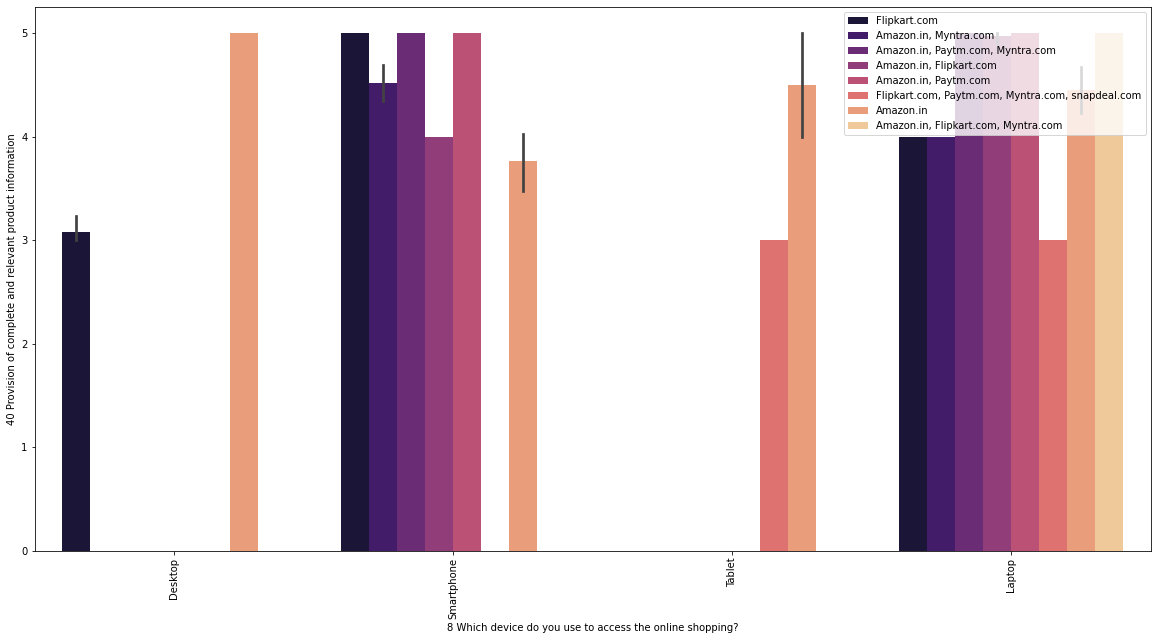

In [25]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='8 Which device do you use to access the online shopping?',
            y='40 Provision of complete and relevant product information',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.xticks(rotation=90);
plt.legend(loc="upper right");

###### Observations:
    
==> Most of the smartphone and Laptop users have commented on each website and people collectively strongly agreed that all the websites has Provision of complete and relevant product information

In [26]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
            y='35 Displaying quality Information on the website improves satisfaction of customers',
            hue='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
   Android users strongly agreed that Displaying quality Information on the website improves satisfaction of customers on websites of Amazon,Flipkart,Paytm and Myntra collectively 

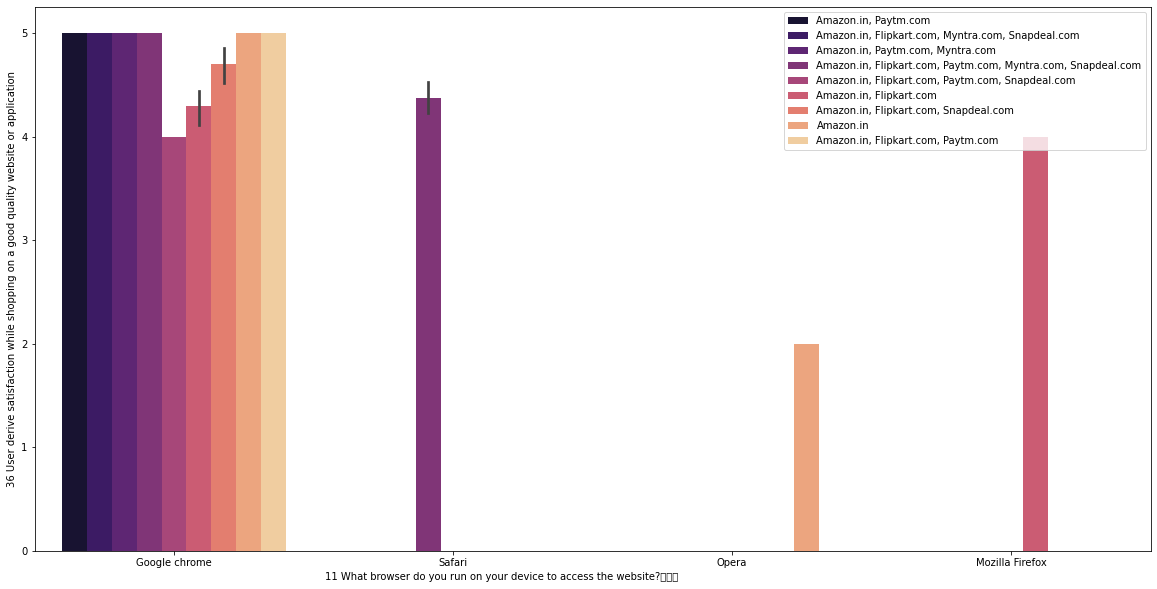

In [27]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='11 What browser do you run on your device to access the website?\t\t\t                                                          ',
            y='36 User derive satisfaction while shopping on a good quality website or application',
            hue='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
    Most of the people use Google chrome as the browser for online shopping and many strongly agreed to 36 User derive satisfaction while shopping on a good quality website or application on all the websites collectively and also Solely Amazon.

In [28]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
            y='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
            hue='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
   People who use E-wallets,Credit/Debit cards and CoD strongly agreed to Amazon,Flipkart,Myntra and Snapdeal Trust that the online retail store will fulfill its part of the transaction at the stipulated time

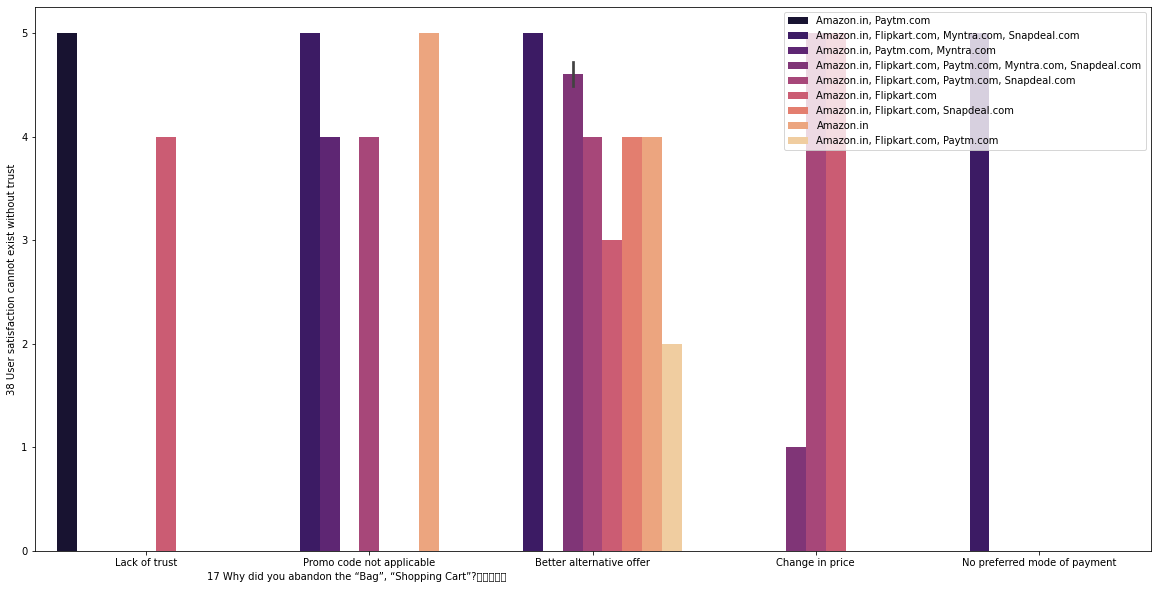

In [29]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
            y='38 User satisfaction cannot exist without trust',
            hue='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
    Many users abondon the cart of various websites for better alternative offer.

In [30]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,
x='16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
            y='37 Net Benefit derived from shopping online can lead to users satisfaction',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
    Users of Amazon and Myntra abandon the cart very frequently.
    Amazon and paytm and collectively abandon the cart frequently
    Amazon,Myntra and paytm collectively bandon the cart sometimes.

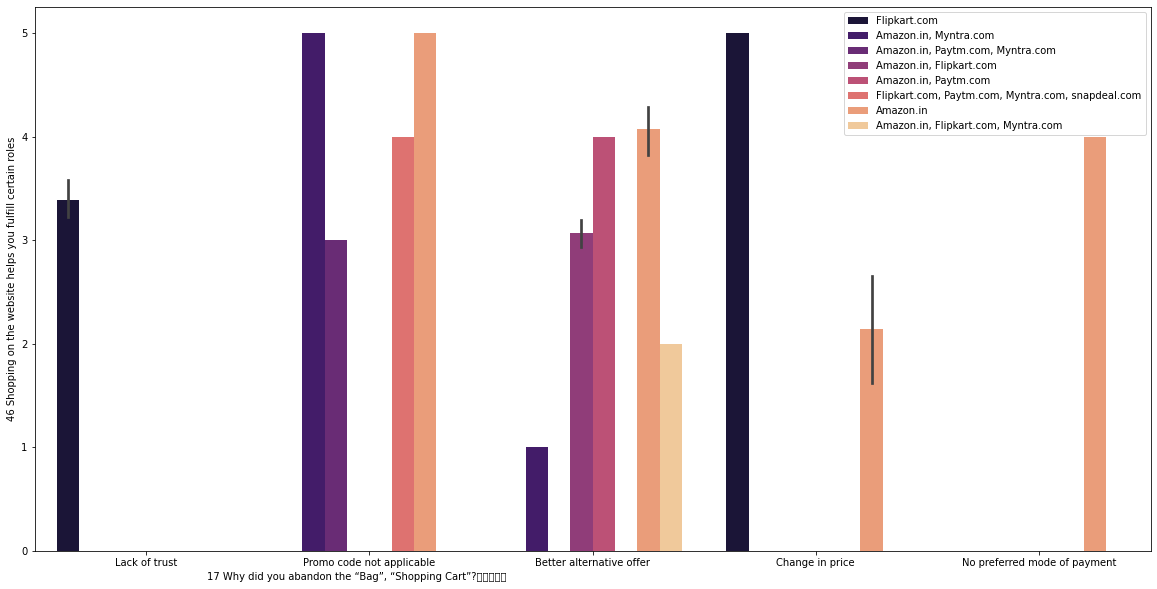

In [31]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,
x='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
y='46 Shopping on the website helps you fulfill certain roles',
hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

###### Observations

Flipkart users strongly agreed and Amazon users disagree in abandoning the cart for change in price

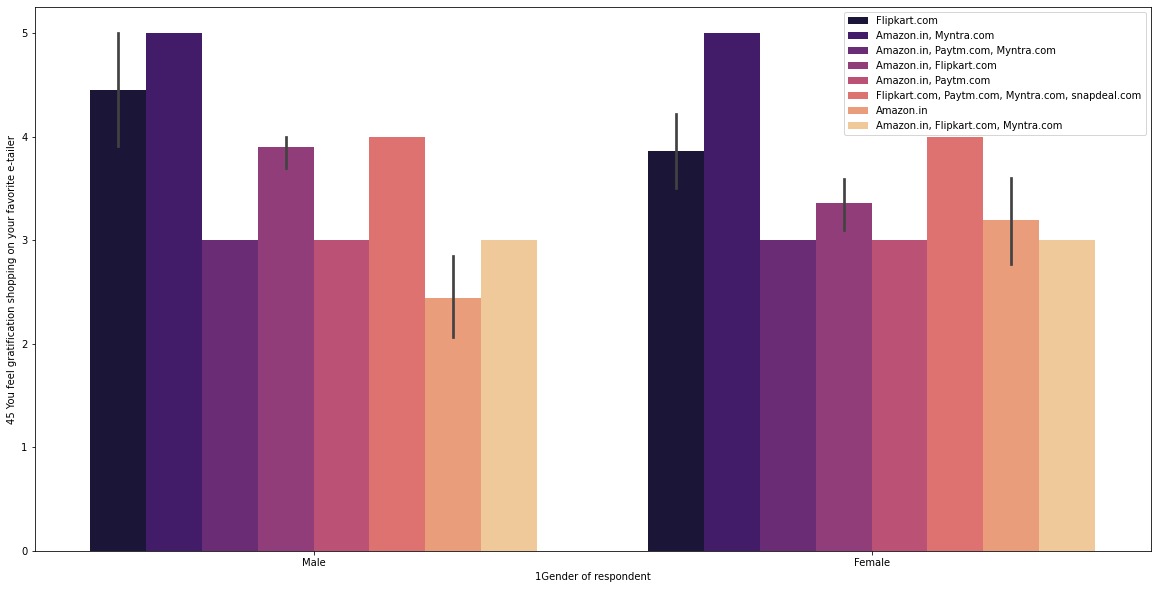

In [32]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='1Gender of respondent',
            y='45 You feel gratification shopping on your favorite e-tailer',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
    Users(both male and female) of Amazon and Myntra together strongly agreed that they feel gratification for shopping on your favorite e-tailer

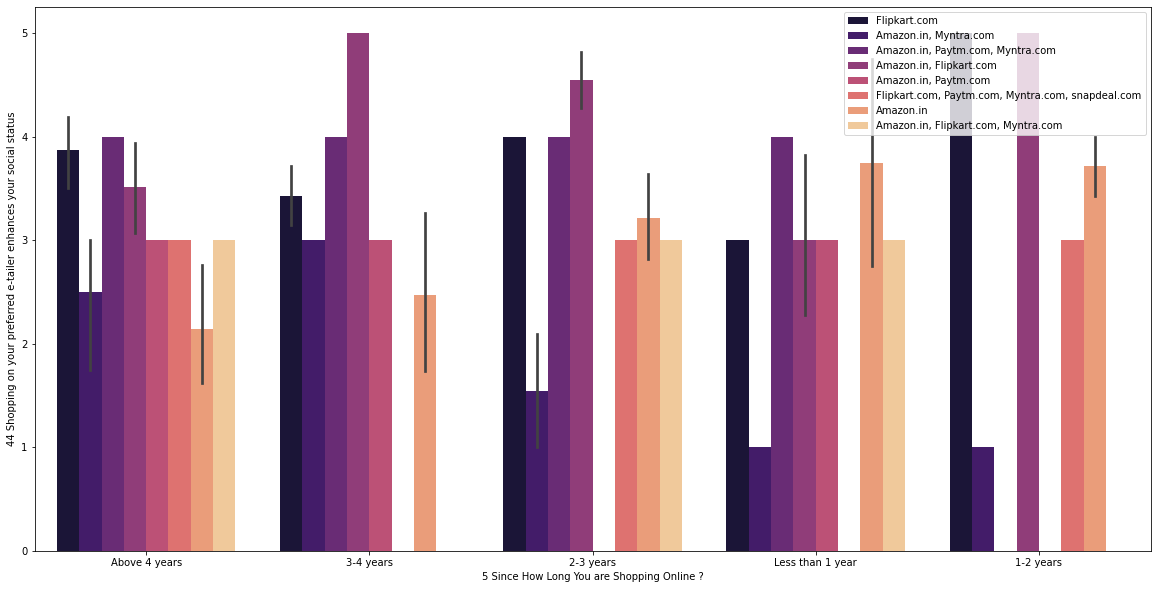

In [33]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='5 Since How Long You are Shopping Online ?',
            y='44 Shopping on your preferred e-tailer enhances your social status',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
    People shopping online for 1-2 years and 3-4 years were strongly agreed to Shopping on preferred e-tailer enhances your social status for Amazon,Flipkart 

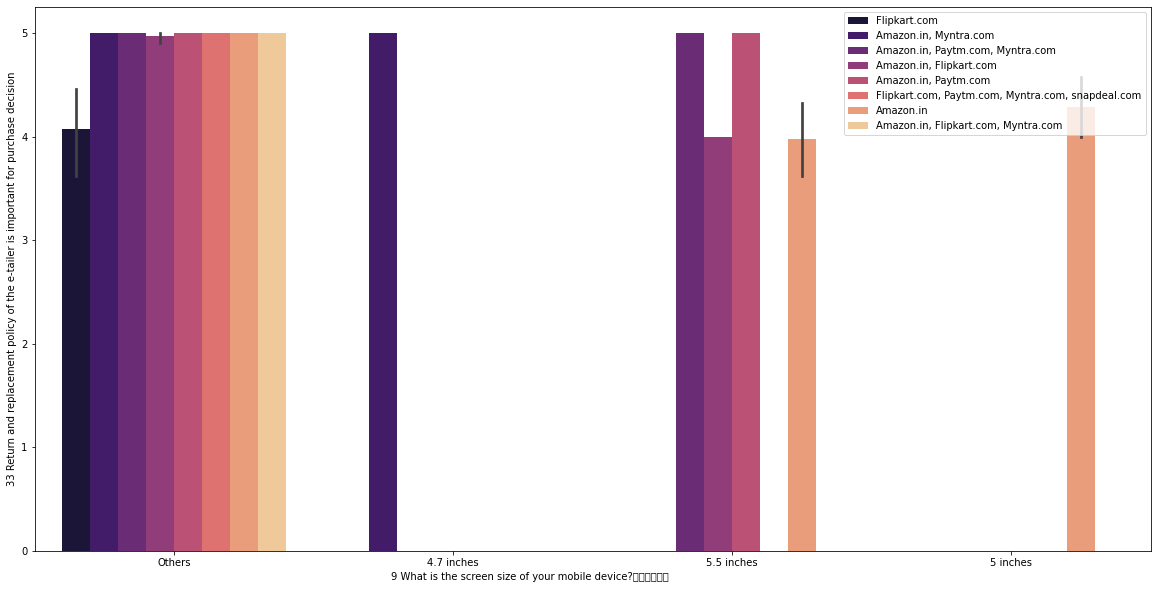

In [34]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
            y='33 Return and replacement policy of the e-tailer is important for purchase decision',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

##### Observations :
    
    The users having device screen size of other than 4.7,5,5.5 are strongly agreed to Return and replacement policy is important for purchase decision of almost all the websites.

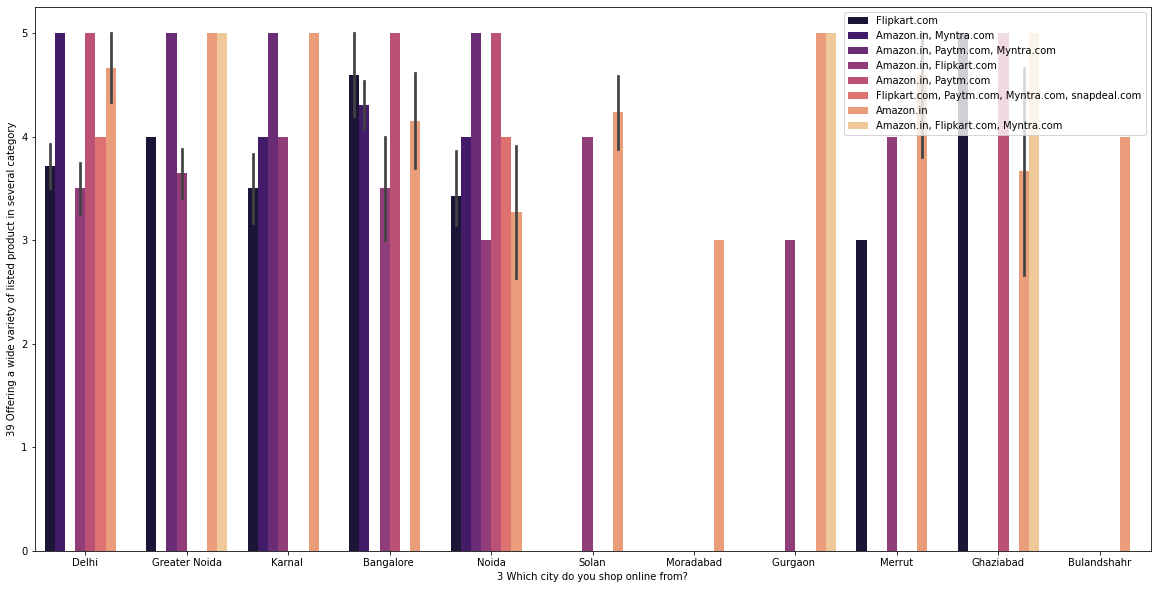

In [35]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='39 Offering a wide variety of listed product in several category',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

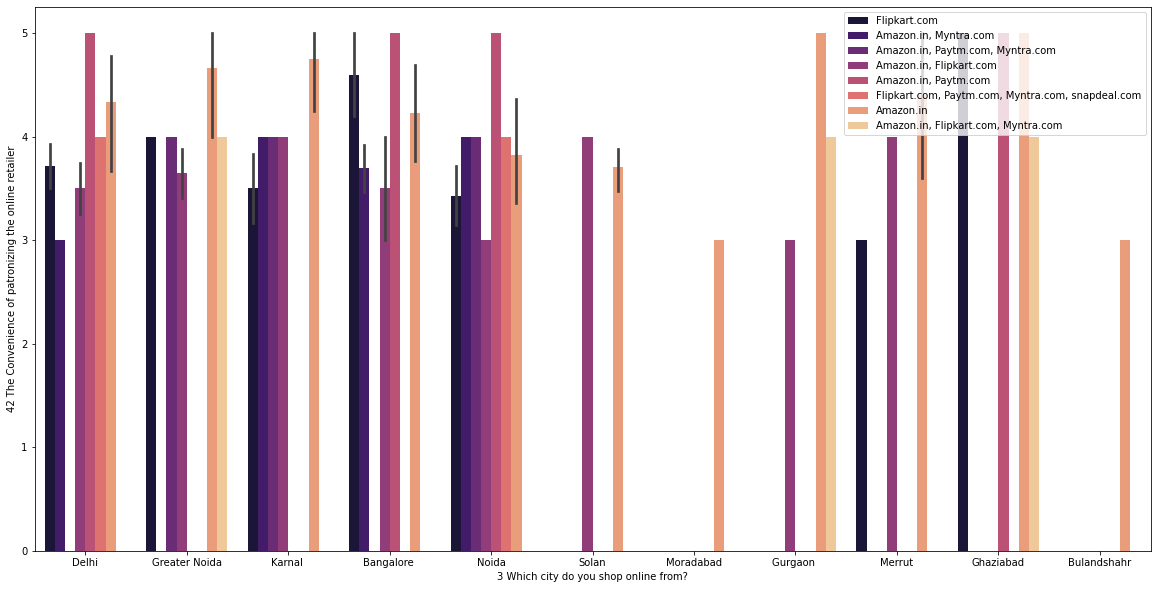

In [36]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='42 The Convenience of patronizing the online retailer',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

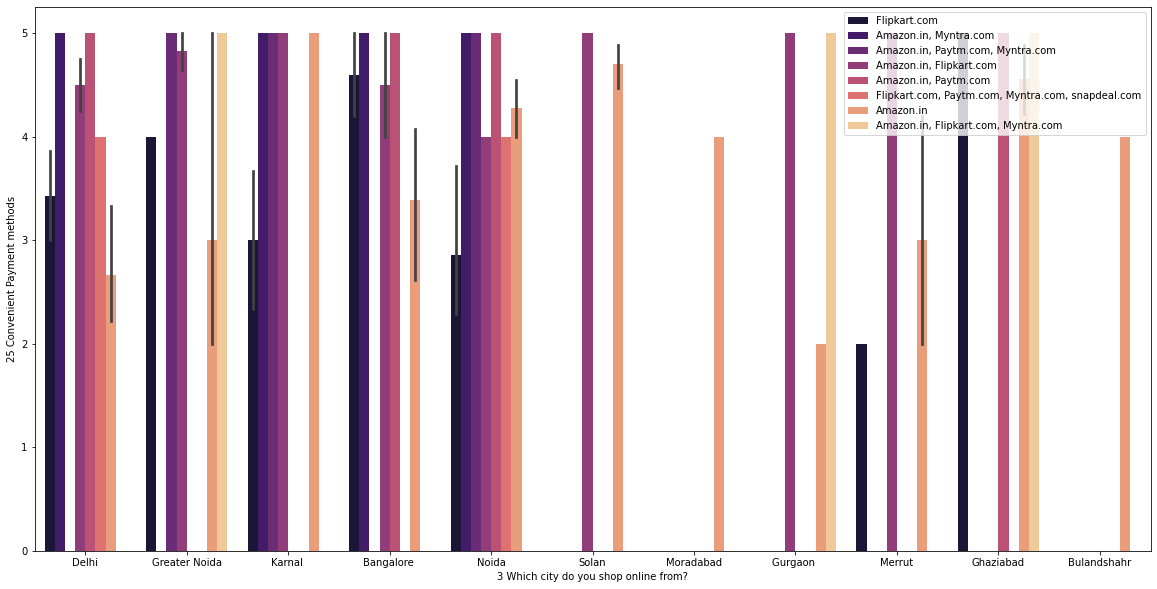

In [37]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='25 Convenient Payment methods',hue='Which of the Indian online retailer would you recommend to a friend?', 
            palette="magma")
plt.legend(loc="upper right");

In [38]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y= '32 Shopping online is convenient and flexible',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

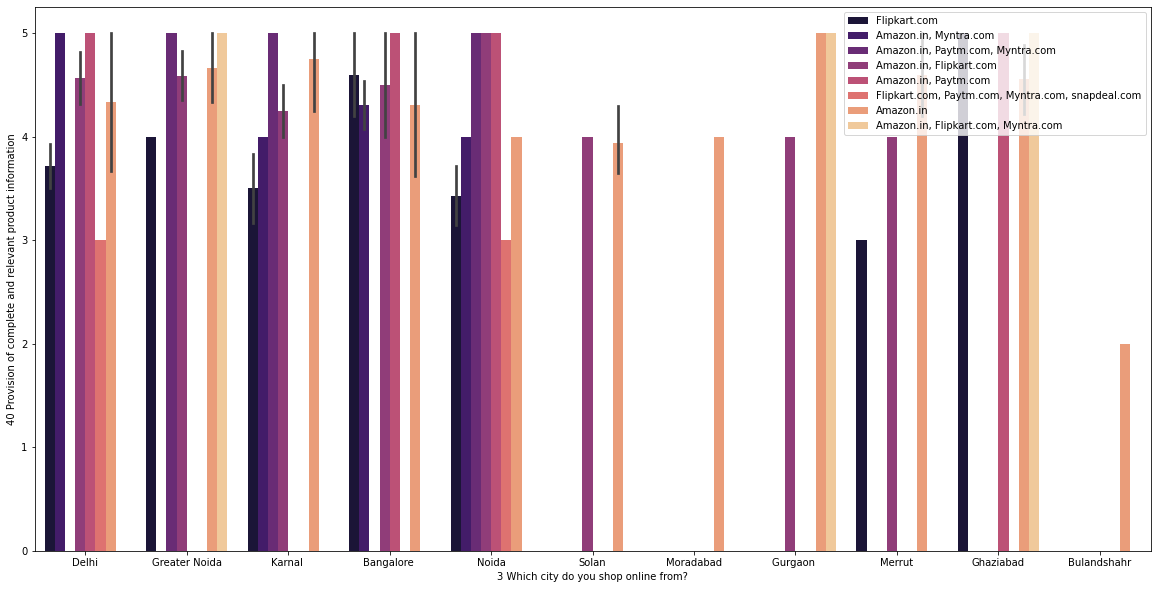

In [39]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y='40 Provision of complete and relevant product information',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

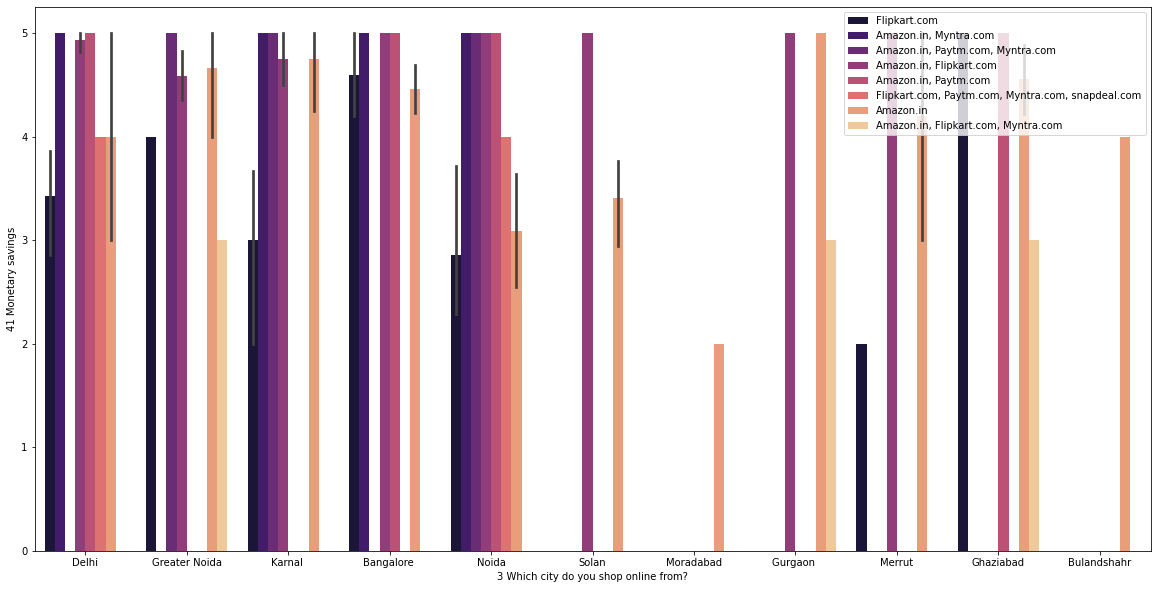

In [40]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,x='3 Which city do you shop online from?',
            y= '41 Monetary savings',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="magma")
plt.legend(loc="upper right");

In [41]:
plt.figure(figsize=[20,10])
sns.swarmplot(data=df,x='3 Which city do you shop online from?',
              y='Complete, relevant description information of products',
              hue='1Gender of respondent', palette="magma")
plt.xticks(rotation=90)
plt.legend(loc="upper right");

###### Observations:
    
==> Female users are more in number and in every city amazon is the common e-commerce site.

==> People of "Greater Noida" are only female users except one and they think Amazon,flipkart,Myntra gave the most relevant information about the products.

==> People of "Delhi" and "Noida" who are male users believes that snapdeal gave the most relevant information about the products.

In [42]:
plt.figure(figsize=[20,10])
sns.barplot(data=df,
            x='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
            y='18 The content on the website must be easy to read and understand',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="rocket")
plt.legend(loc="upper right");

###### Observations:

Many users strongly agreed that Flipkart users take less than 1 minute,1-5 minutes of Amazon before making a purchase decision

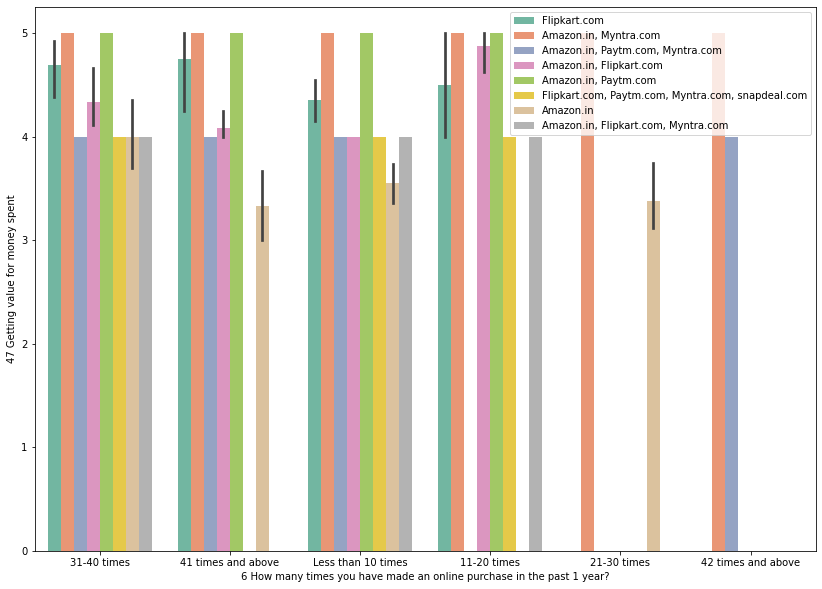

In [43]:
plt.figure(figsize=[14,10])
sns.barplot(data=df,y='47 Getting value for money spent',
            x='6 How many times you have made an online purchase in the past 1 year?',
            hue='Which of the Indian online retailer would you recommend to a friend?', palette="Set2")
plt.legend(loc="upper right");

###### Observations:
    
    People who have made an online purchase in the past 1 year of less than 10 times have commented on every website for getting value for money.

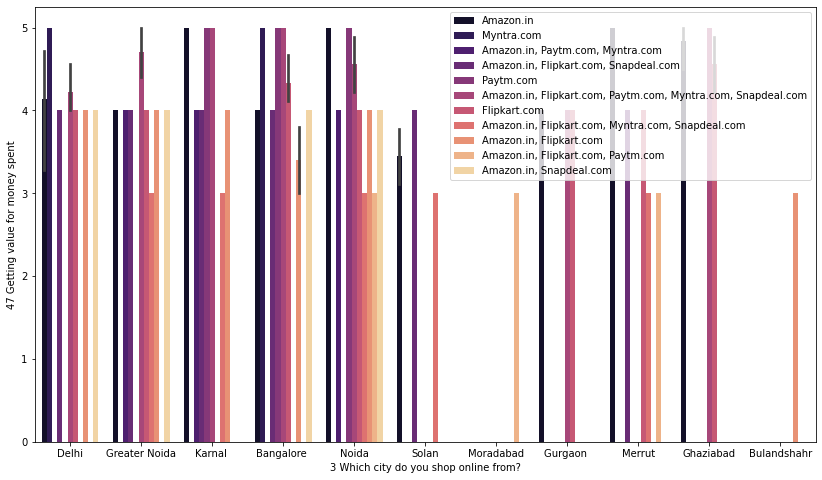

In [44]:
plt.figure(figsize=[14,8])
sns.barplot(data=df,y='47 Getting value for money spent',
            x='3 Which city do you shop online from?',
            hue='Security of customer financial information', palette="magma")
plt.legend(loc="upper right");

###### Observations:
    
    Amazon users are the more in number in most of the cities and found the products good value for money.

<Figure size 1728x576 with 0 Axes>

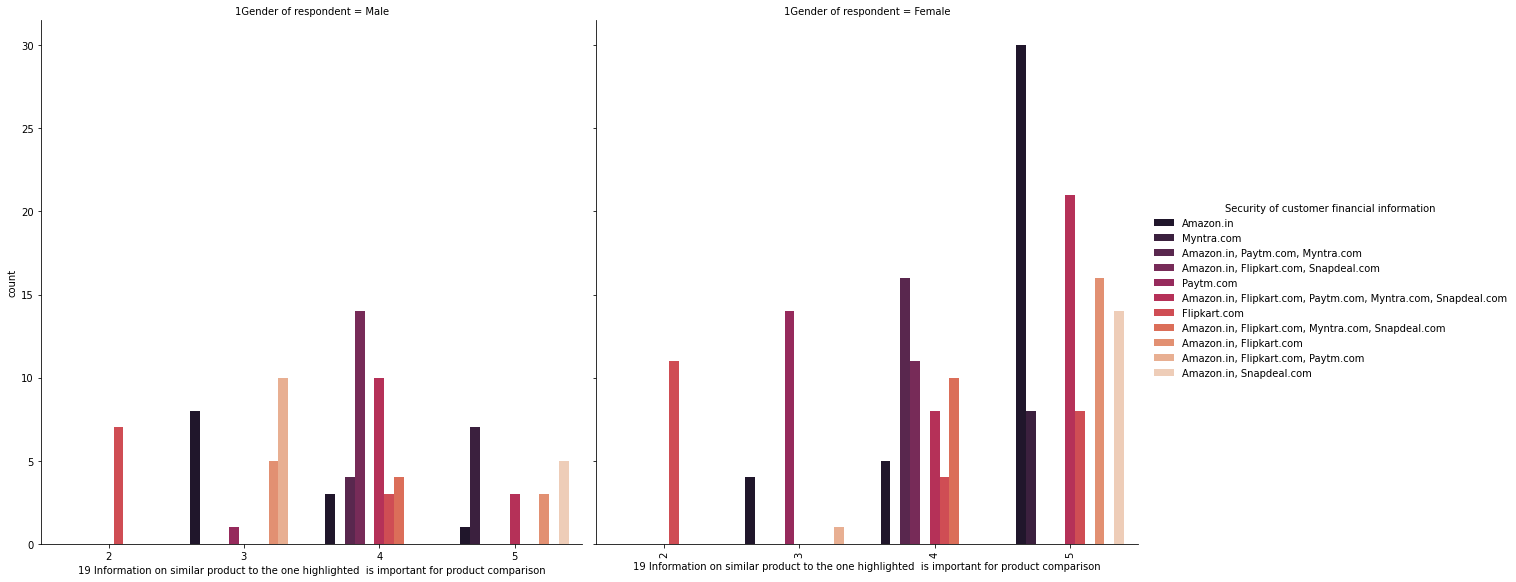

In [45]:
plt.figure(figsize=[24,8])
sns.catplot(x='19 Information on similar product to the one highlighted  is important for product comparison', 
            hue='Security of customer financial information', 
            col='1Gender of respondent',data=df, kind="count",height=8, aspect=1, palette="rocket")
plt.xticks(rotation=90);

###### Observations:
    
 Most of the Amazon users are Female and  strongly agreed to the Information on similar product to the one highlighted  is important for product comparison

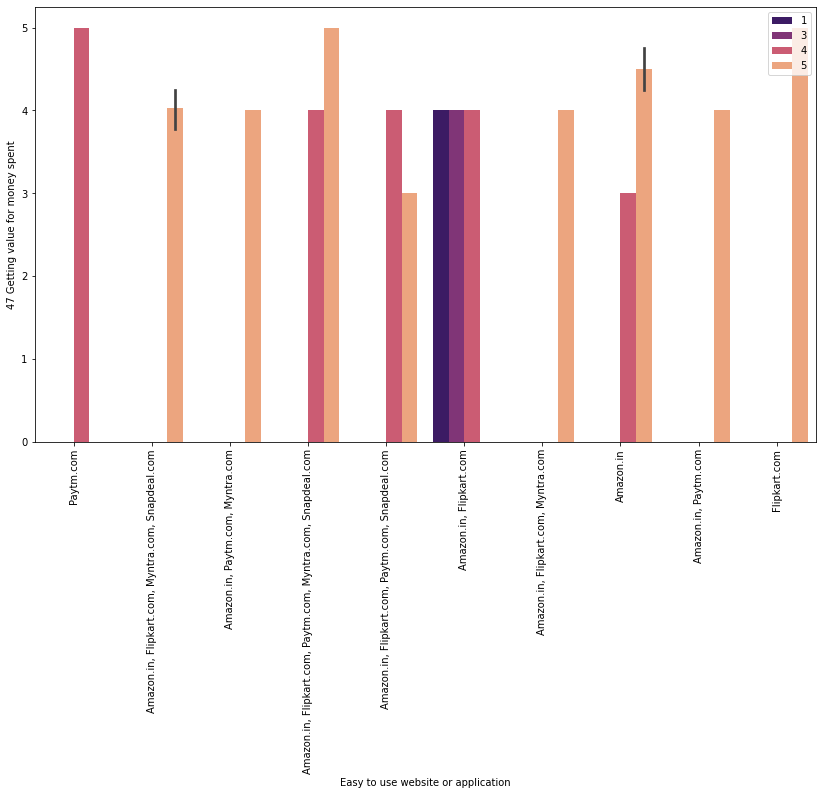

In [46]:
plt.figure(figsize=[14,8])
sns.barplot(data=df,y='47 Getting value for money spent',
            x='Easy to use website or application',
            hue='18 The content on the website must be easy to read and understand', palette="magma")
plt.xticks(rotation=90)
plt.legend(loc="upper right");

###### Observations:
    
   Most of the people strongly agreed that Amazon,Flipkart,Paytm,Myntra,Snapdeal collectively are easy to use and getting the products value for money spent.

<Figure size 720x576 with 0 Axes>

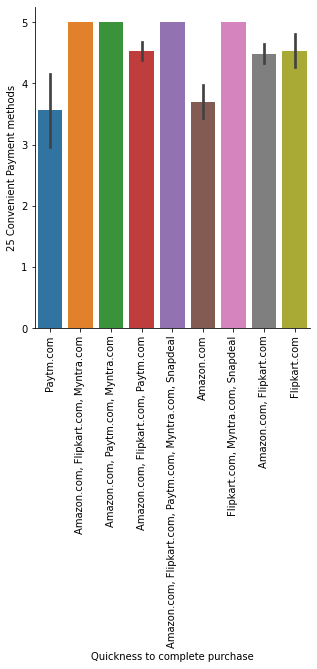

In [47]:
plt.figure(figsize=[10,8])
sns.catplot(y='25 Convenient Payment methods',x='Quickness to complete purchase',data=df,kind="bar")
plt.xticks(rotation=90);

###### Observations:
    
    Amazon and paytm are solely less covenient payment methods.But, togetherly they have good convenience.

<Figure size 720x576 with 0 Axes>

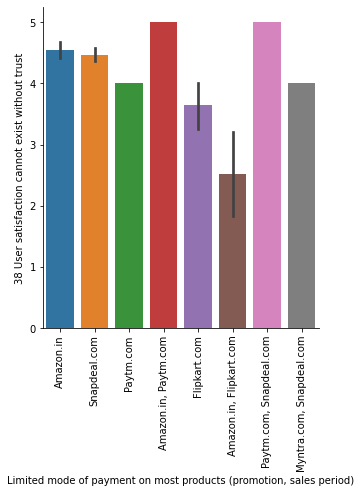

In [48]:
plt.figure(figsize=[10,8])
sns.catplot(x='Limited mode of payment on most products (promotion, sales period)',
            y='38 User satisfaction cannot exist without trust',data=df,kind="bar")
plt.xticks(rotation=90);

###### Observations:
    
   Users satisfied with Amazon and paytm,paytm and snapdeal togetherly for Limited mode of payment on most products.

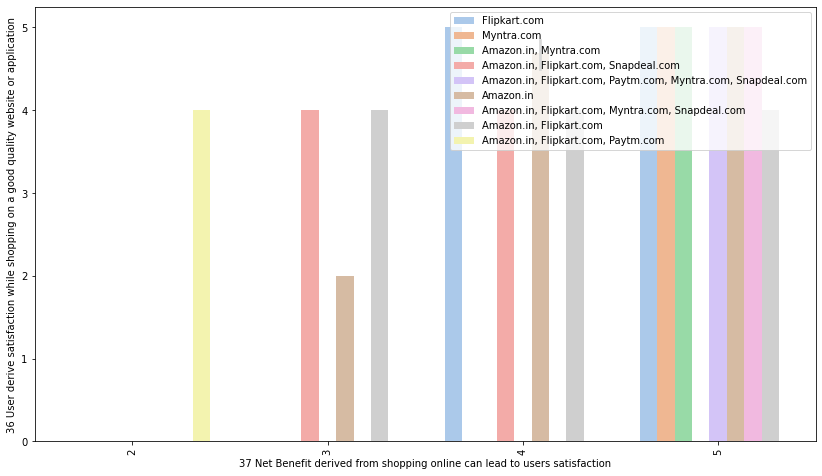

In [49]:
plt.figure(figsize=[14,8])
sns.barplot(data=df,x='37 Net Benefit derived from shopping online can lead to users satisfaction',
            y='36 User derive satisfaction while shopping on a good quality website or application',
            hue='Perceived Trustworthiness', palette='pastel')
plt.xticks(rotation=90)
plt.legend(loc="upper right");

###### Observations:
    
    Many users strongly agreed that Amazon solely have good quality and Net Benefit.

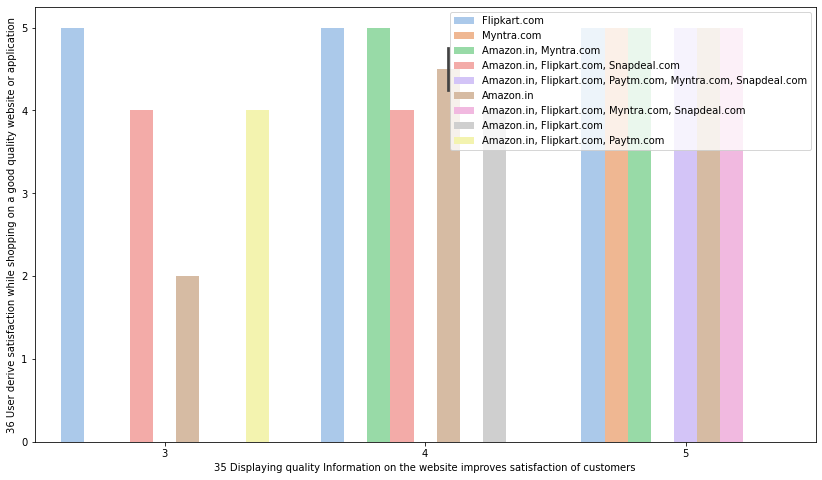

In [50]:
plt.figure(figsize=[14,8])
sns.barplot(data=df,x='35 Displaying quality Information on the website improves satisfaction of customers',
            y='36 User derive satisfaction while shopping on a good quality website or application',
            hue='Perceived Trustworthiness', palette='pastel')
plt.legend(loc="upper right");

###### Observations:
    
    Many users strongly agreed that Amazon solely displays good quality information and the users are well satisfied.

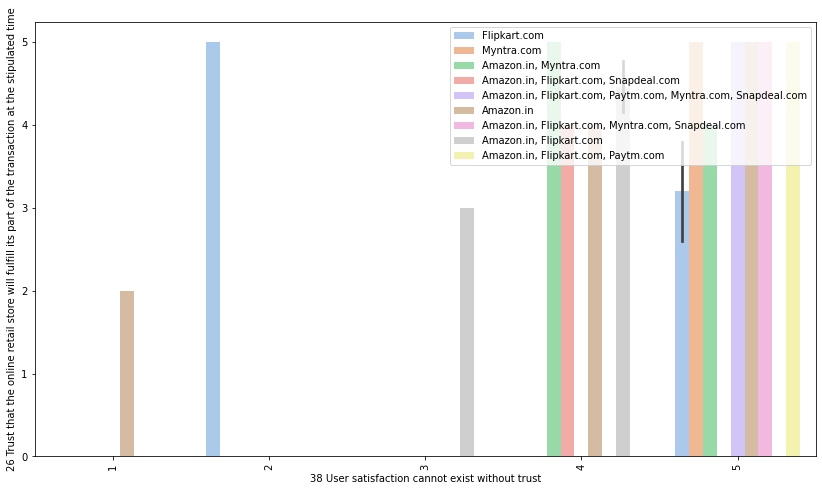

In [51]:
plt.figure(figsize=[14,8])
sns.barplot(data=df,x='38 User satisfaction cannot exist without trust',
            y='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
            hue='Perceived Trustworthiness', palette='pastel')
plt.xticks(rotation=90)
plt.legend(loc="upper right");

###### Observations:
    
Most of the users strongly believe that they have good trust on all the online shopping websites and are well satisfied and Amazon solely have good trust.

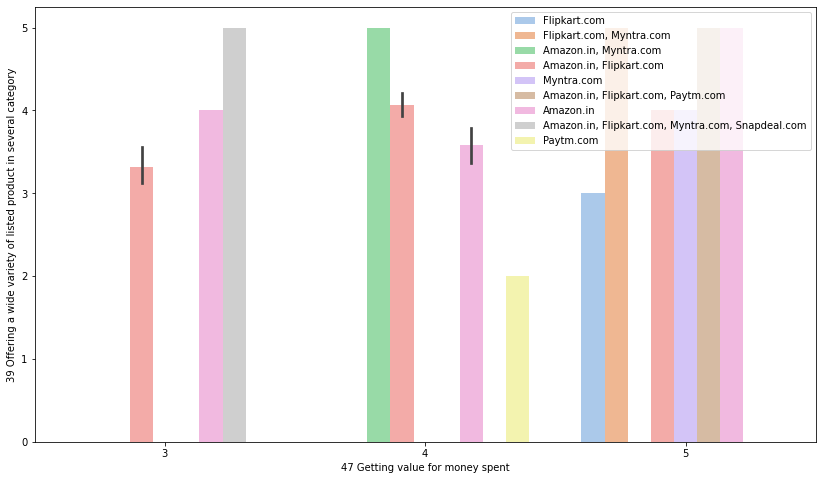

In [52]:
plt.figure(figsize=[14,8])
sns.barplot(data=df,x='47 Getting value for money spent',y='39 Offering a wide variety of listed product in several category',
            hue='Wild variety of product on offer', palette='pastel')
plt.legend(loc="upper right");

###### Observations:

   Users of Amazon solely and Amazon,Flipkart,Paytm collectively have products of good value for money and also they offer a wide variety of listed product in several category. 

# Conclusion: 

#### Majority of the people uses Amazon and is highly recommended followed by Flipkart, Myntra. Because most of the important features like quality trust,transactions delivery are better in Amazon.

#### Finally we can conclude that Amazon fulfilled most of the customer requirements in most of the aspects. So,we can recommend Amazon to others.